<a href="https://colab.research.google.com/github/kalyanimane/project-file/blob/main/electric_motor_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Necessary Library**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

# **EDA**

Load The Dataset of temperature_data

In [2]:
td=pd.read_csv('temperature_data (1).csv')

In [3]:
# Displaying top 15 rows
td.head(15)

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4.0
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4.0
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4.0
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4.0
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4.0
5,-0.762936,-1.116955,0.334901,-1.303017,-1.222429,-0.248197,1.031031,-0.246341,-2.522203,-1.831931,-2.062549,-2.017884,4.0
6,-0.749228,-1.116170,0.335014,-1.302082,-1.222430,-0.247914,1.030493,-0.246162,-2.522538,-1.833012,-2.062115,-2.017243,4.0
7,-0.738450,-1.113986,0.336256,-1.305155,-1.222432,-0.248321,1.030107,-0.246035,-2.522844,-1.832182,-2.061953,-2.017213,4.0
8,-0.730910,-1.111828,0.334905,-1.303790,-1.222431,-0.247785,1.029851,-0.245981,-2.522808,-1.831576,-2.062443,-2.017739,4.0
9,-0.727130,-1.109486,0.335988,-1.305633,-1.222431,-0.248294,1.029636,-0.245888,-2.522677,-1.831438,-2.062317,-2.018180,4.0


In [4]:
# Displaying last 15 rows
td.tail(15)

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
23535,0.063196,-1.047644,-1.028152,0.923784,1.212484,0.356798,-0.831723,0.323291,-0.039503,-0.226131,0.233660,0.576210,4.0
23536,0.065112,-1.051429,-1.028879,0.921589,1.212483,0.357222,-0.831449,0.323344,-0.039460,-0.226181,0.232570,0.572736,4.0
23537,0.057533,-1.055090,-1.028284,0.924017,1.212483,0.357219,-0.830474,0.323424,-0.039281,-0.226216,0.232140,0.569269,4.0
23538,0.050784,-1.058409,-1.029431,0.922780,1.212479,0.356988,-0.831957,0.323665,-0.039771,-0.226242,0.231412,0.565292,4.0
23539,0.034729,-1.061302,-1.028796,0.923133,1.212477,0.357047,-0.832060,0.323286,-0.038033,-0.226260,0.230718,0.560962,4.0
23540,0.009449,-1.063710,-1.029479,0.922459,1.212481,0.357036,-0.832599,0.323647,-0.037320,-0.226273,0.230364,0.558070,4.0
23541,-0.010253,-1.065335,-1.029321,0.921231,1.212487,0.356718,-0.832519,0.323563,-0.036022,-0.226251,0.229982,0.555844,4.0
23542,-0.027351,-1.065802,-1.028396,0.922876,1.212479,0.356431,-0.831114,0.323434,-0.036479,-0.226249,0.226103,0.553149,4.0
23543,-0.038061,-1.065322,-1.029072,0.922877,1.212481,0.356344,-0.831693,0.323640,-0.038450,-0.226265,0.223561,0.549868,4.0
23544,-0.048762,-1.064295,-1.028756,0.923442,1.212482,0.356870,-0.831739,0.323408,-0.038849,-0.226277,0.223542,0.544711,4.0


In [5]:
# Display the numbers of rows and coloums
td.shape

(23550, 13)

In [6]:
# Display the datatypes
td.dtypes

,0
ambient,float64
coolant,float64
u_d,float64
u_q,float64
motor_speed,float64
torque,float64
i_d,float64
i_q,float64
pm,float64
stator_yoke,float64


In [7]:
td.columns

Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d',
       'i_q', 'pm', 'stator_yoke', 'stator_tooth', 'stator_winding',
       'profile_id'],
      dtype='object')

In [8]:
# Display information of dataset
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23550 entries, 0 to 23549
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ambient         23550 non-null  float64
 1   coolant         23550 non-null  float64
 2   u_d             23550 non-null  float64
 3   u_q             23549 non-null  float64
 4   motor_speed     23549 non-null  float64
 5   torque          23549 non-null  float64
 6   i_d             23549 non-null  float64
 7   i_q             23549 non-null  float64
 8   pm              23549 non-null  float64
 9   stator_yoke     23549 non-null  float64
 10  stator_tooth    23549 non-null  float64
 11  stator_winding  23549 non-null  float64
 12  profile_id      23549 non-null  float64
dtypes: float64(13)
memory usage: 2.3 MB


In [9]:
# displaying summary statistics for all numerical column
td.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
count,23550.000000,23550.000000,23550.000000,23549.000000,23549.000000,23549.000000,23549.000000,23549.000000,23549.000000,23549.000000,23549.000000,23549.000000,23549.0
mean,-0.494769,-1.069757,-0.350779,0.806765,0.468470,0.256285,0.140982,0.275974,-0.739900,-1.063012,-0.921772,-0.807645,4.0
std,0.325244,0.018091,0.728270,0.511497,0.970616,0.688715,0.967192,0.702337,1.084874,0.486484,0.782001,0.956889,0.0
min,-1.658480,-1.156575,-1.574856,-1.306618,-1.222434,-0.404643,-1.844941,-0.257432,-2.524219,-1.834688,-2.066143,-2.019973,4.0
25%,-0.755385,-1.084400,-0.964061,0.641063,-0.140248,-0.259413,-0.786367,-0.245723,-1.617098,-1.514040,-1.679808,-1.723398,4.0
50%,-0.603110,-1.071865,0.180892,0.931772,-0.140246,-0.259085,0.386198,-0.245710,-1.063108,-1.083359,-1.066662,-0.875622,4.0
75%,-0.183865,-1.057624,0.298095,0.959311,2.024116,1.019015,1.029139,1.136762,-0.191631,-0.811279,-0.453608,-0.333414,4.0
max,0.626743,-1.012797,0.336557,1.762809,2.024164,1.967097,1.032845,1.894011,2.291651,0.190087,1.078445,1.588526,4.0


In [10]:
# checking for duplicated rows
td.duplicated().sum()

0

In [11]:
# checking for missing values
td.isnull().sum()

,0
ambient,0
coolant,0
u_d,0
u_q,1
motor_speed,1
torque,1
i_d,1
i_q,1
pm,1
stator_yoke,1


In [12]:
unique_values = td['profile_id'].unique()
print(unique_values)

[ 4. nan]


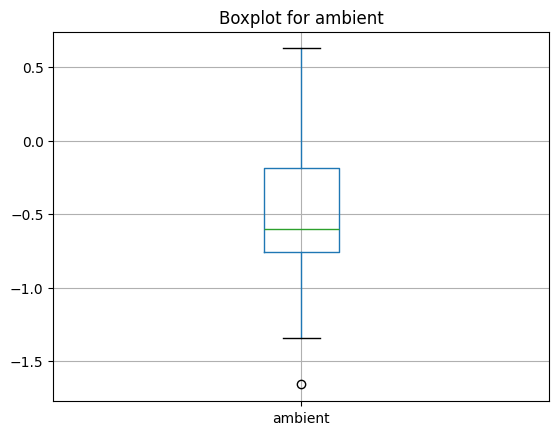

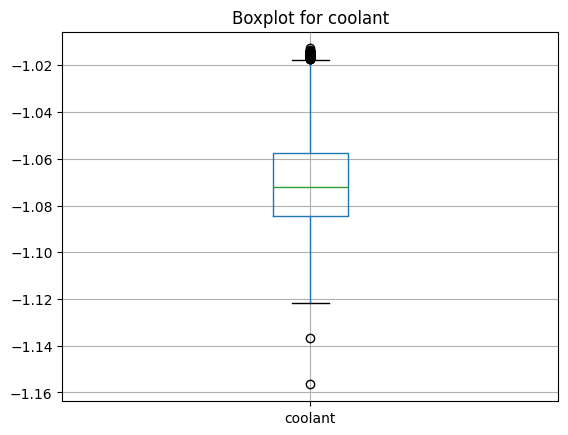

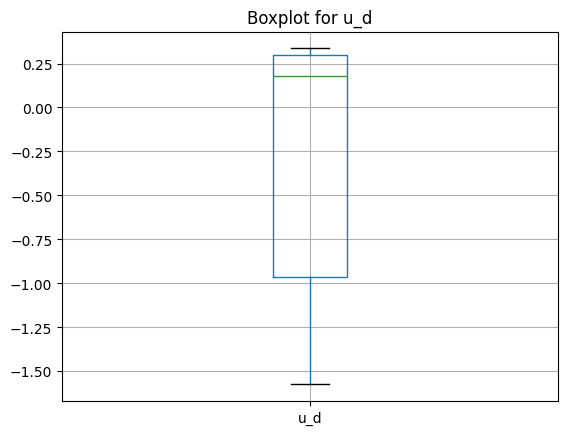

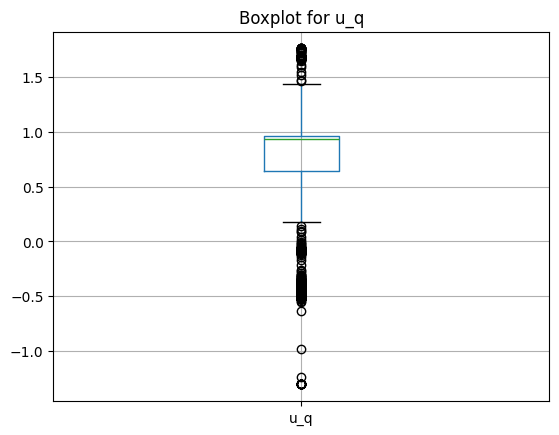

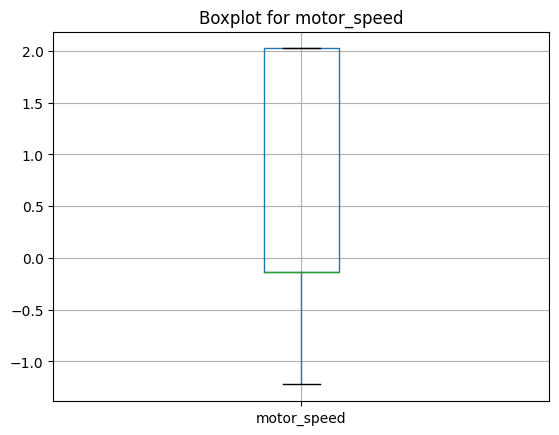

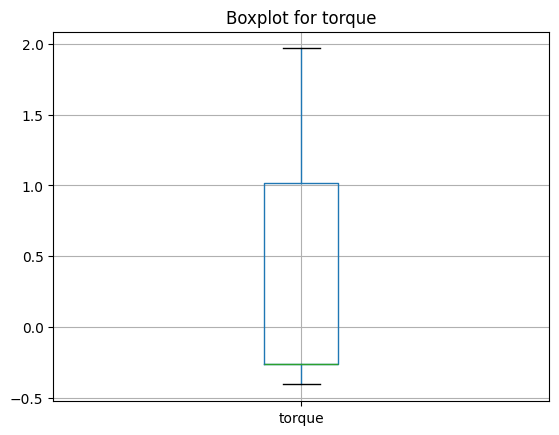

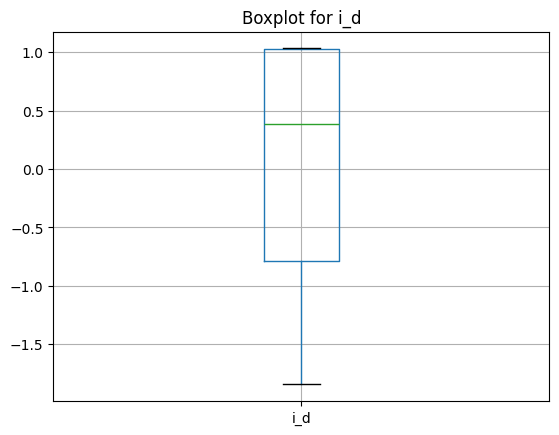

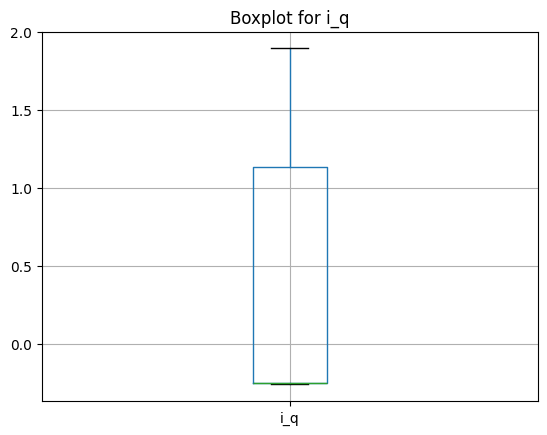

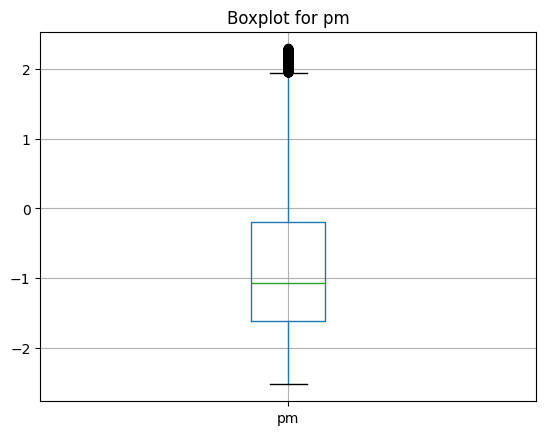

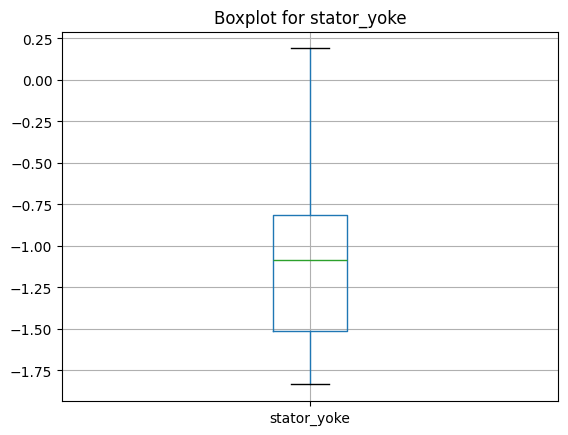

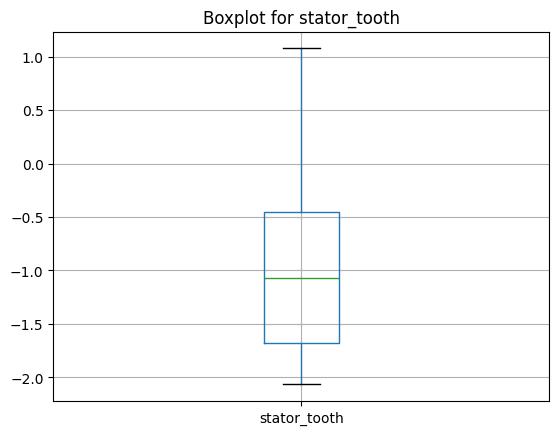

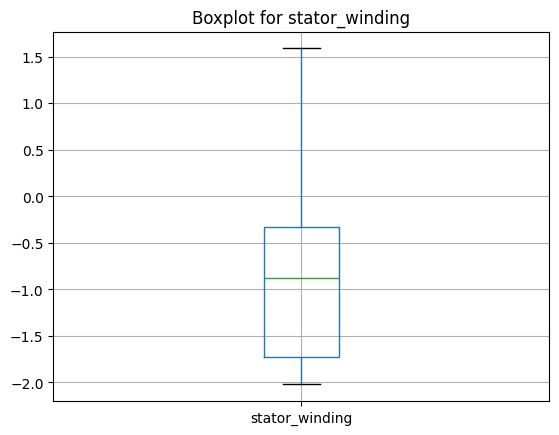

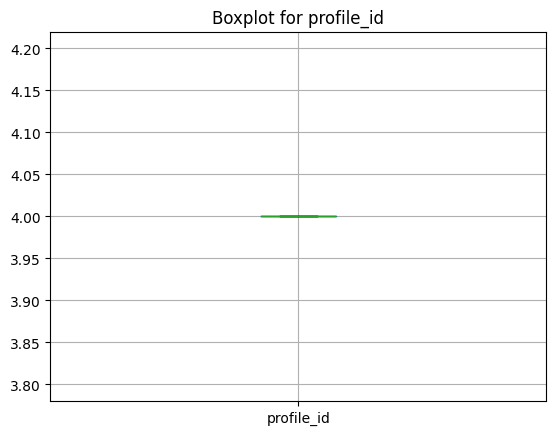

In [13]:
# Boxplot for Checking Outliers
for column in td. columns:
    plt.figure()
    td.boxplot(column=column)
    plt.title(f'Boxplot for {column}')
    plt.show()


In [14]:
# calculate the numbers of outliers per column using IQR method
outliers_count = ((td < (td.quantile(0.25) - 1.5 * (td.quantile(0.75) - td.quantile(0.25)))))
outliers_count

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,False,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23545,False,False,False,False,False,False,False,False,False,False,False,False,False
23546,False,False,False,False,False,False,False,False,False,False,False,False,False
23547,False,False,False,False,False,False,False,False,False,False,False,False,False
23548,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
# remove outliers
def outlier_Detection (td,columns):
  for col in columns:
    Q1=td[col].quantile(0.25)
    Q3=td[col].quantile(0.75)
    iqr=Q3-Q1
    lower=Q1-1.5*iqr
    upper=Q3+1.5*iqr
    td[col]=np.where(td[col]>upper,upper,np.where(td[col]<lower,lower,td[col]))
    return td

In [16]:
outlier_Detection(td,td.columns)

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4.0
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4.0
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4.0
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4.0
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23545,-0.060896,-1.062320,-1.028410,0.922917,1.212484,0.356594,-0.832397,0.323461,-0.037740,-0.226731,0.220459,0.538742,4.0
23546,-0.071967,-1.059155,-1.027808,0.924254,1.212480,0.356946,-0.831477,0.323321,-0.037644,-0.226862,0.209700,0.533634,4.0
23547,-0.084551,-1.054594,-1.028349,0.922122,1.212480,0.357326,-0.831317,0.323422,-0.036790,-0.226704,0.200556,0.528910,4.0
23548,-0.097951,-1.050203,-1.028019,0.923719,1.212480,0.357490,-0.830752,0.323157,-0.036050,-0.227674,0.194932,0.525644,4.0


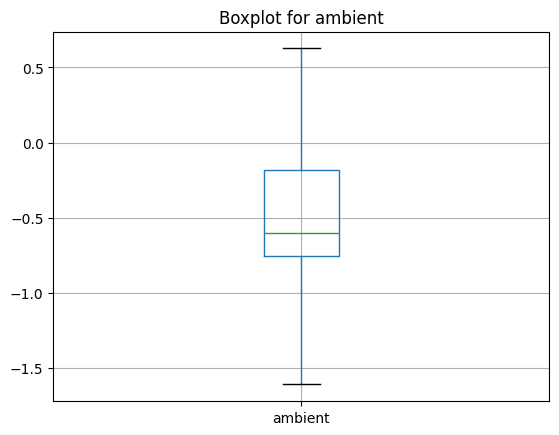

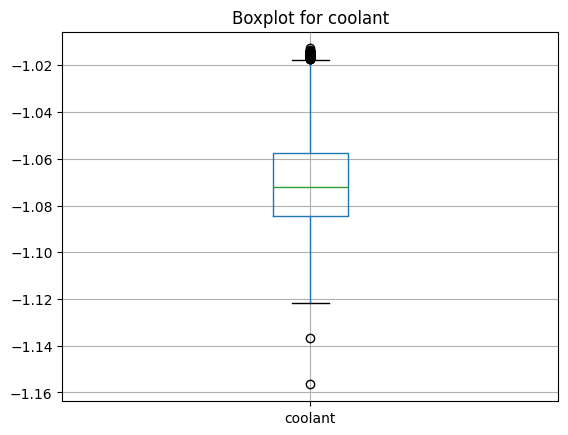

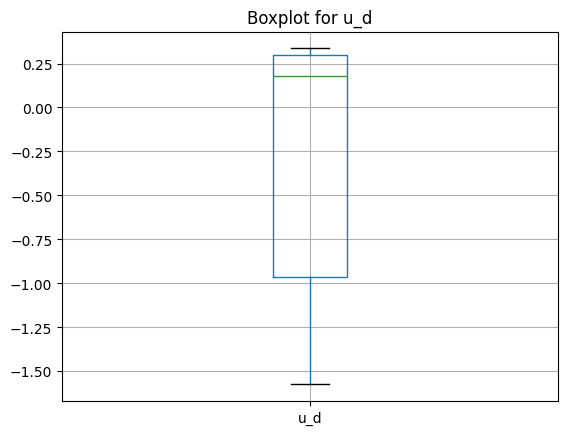

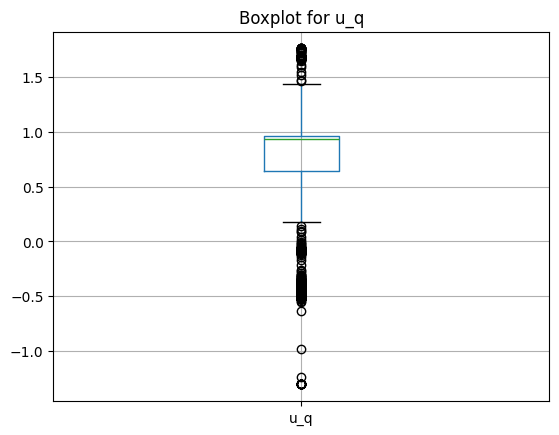

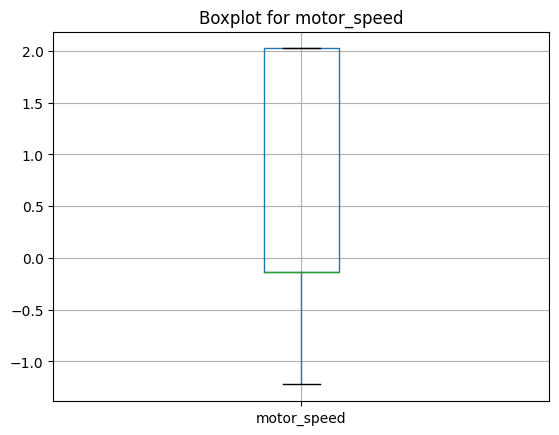

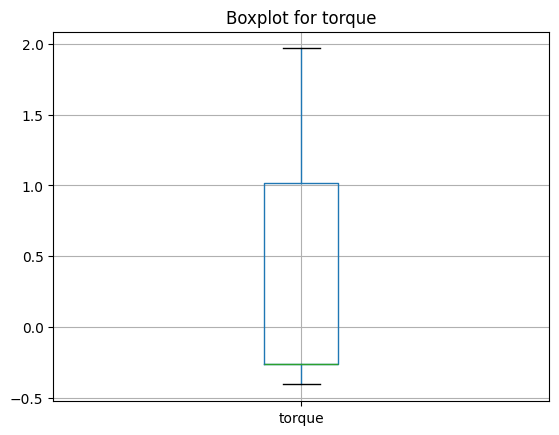

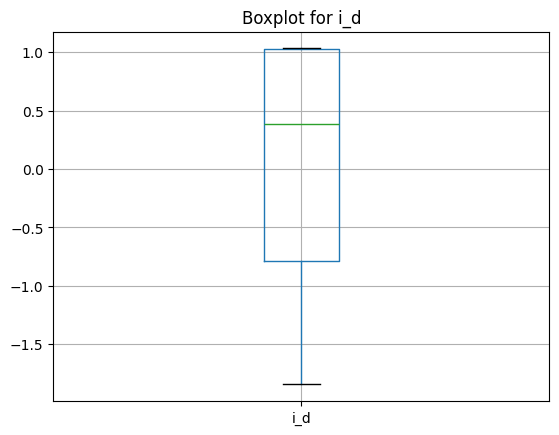

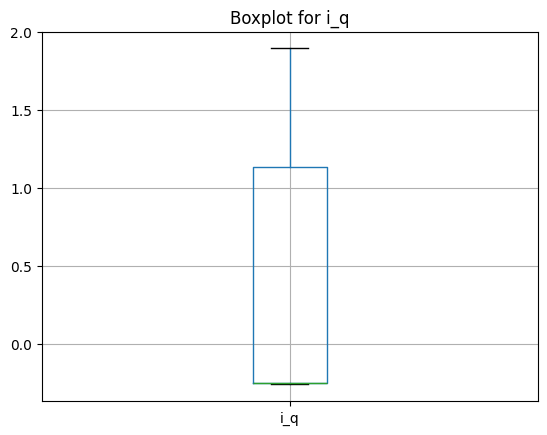

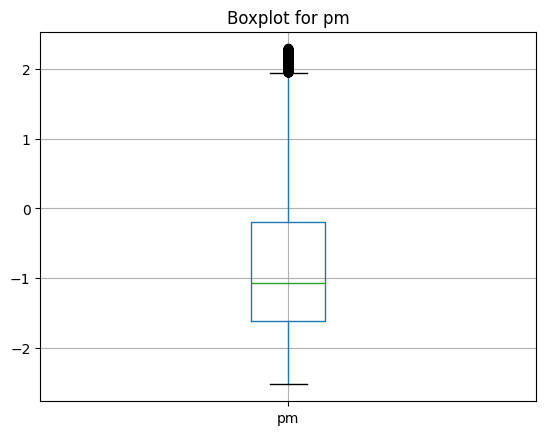

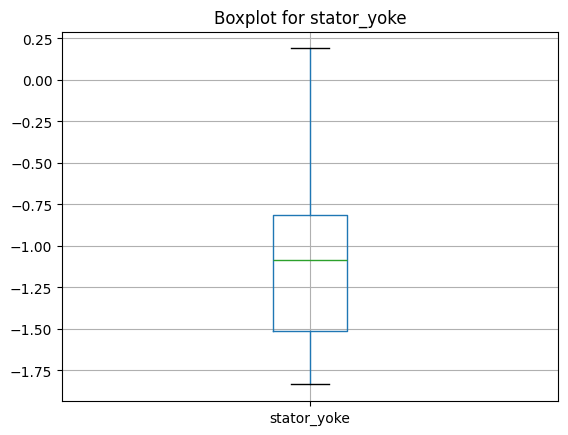

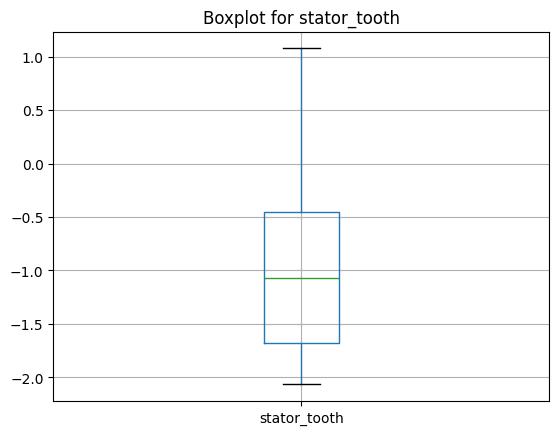

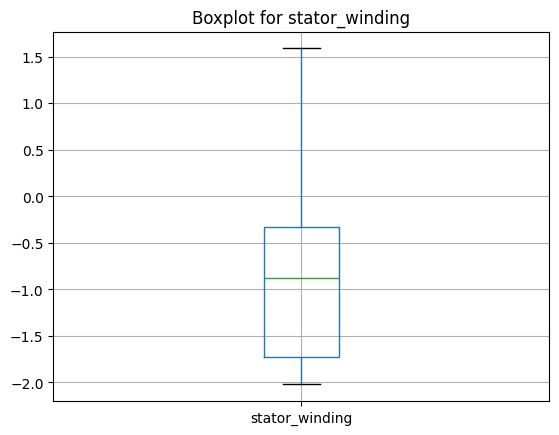

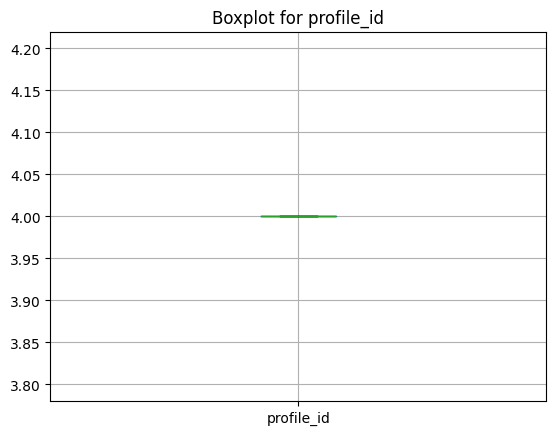

In [17]:
# checkng for outliers through the boxplot
for column in td.columns:
  plt.figure()
  td.boxplot(column=column)
  plt.title(f'Boxplot for {column}')
  plt.show()

In [18]:
# calculate the number of outliers per column using IQR method
outliers_count = ((td < (td.quantile(0.25) - 1.5 * (td.quantile(0.75) - td.quantile(0.25))))) |(td > (td.quantile(0.75) + 1.5 * (td.quantile(0.75) - td.quantile(0.25))))
outliers_count

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,False,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23545,False,False,False,False,False,False,False,False,False,False,False,False,False
23546,False,False,False,False,False,False,False,False,False,False,False,False,False
23547,False,False,False,False,False,False,False,False,False,False,False,False,False
23548,False,False,False,False,False,False,False,False,False,False,False,False,False


## visualization

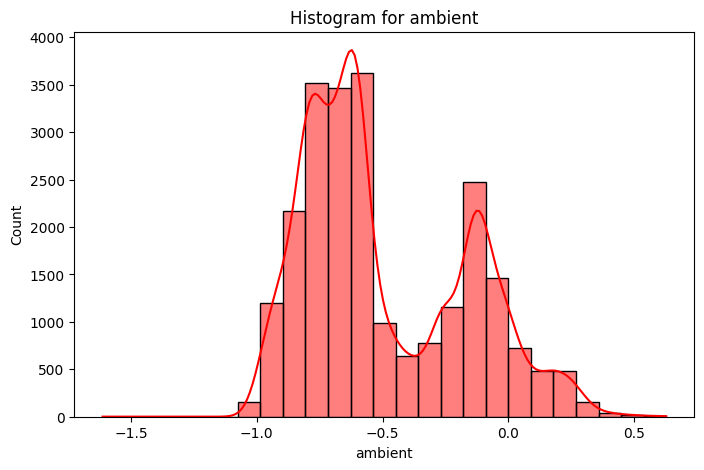

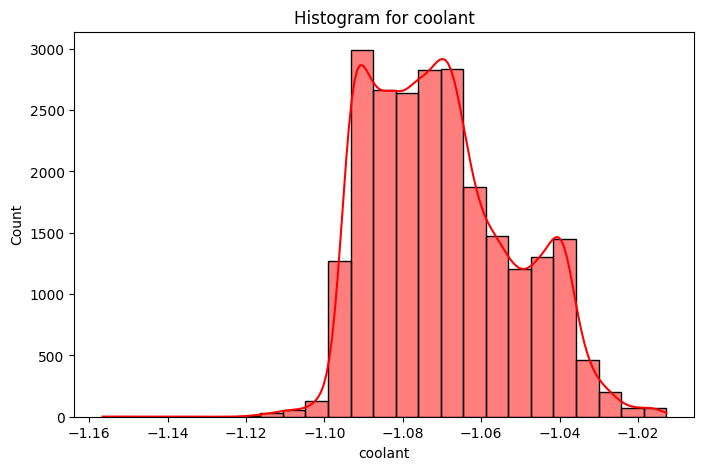

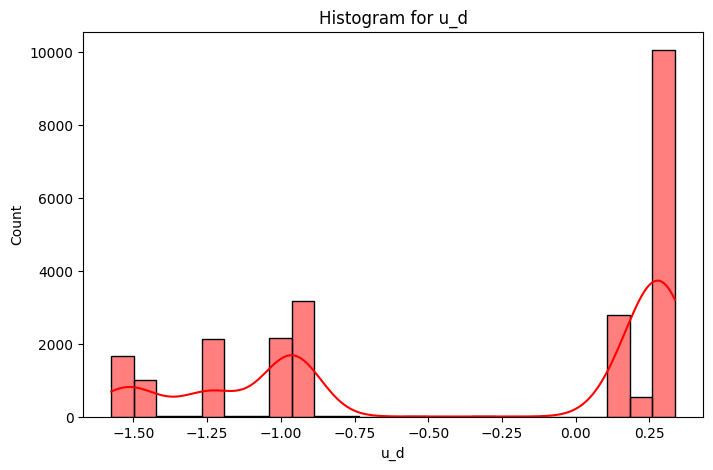

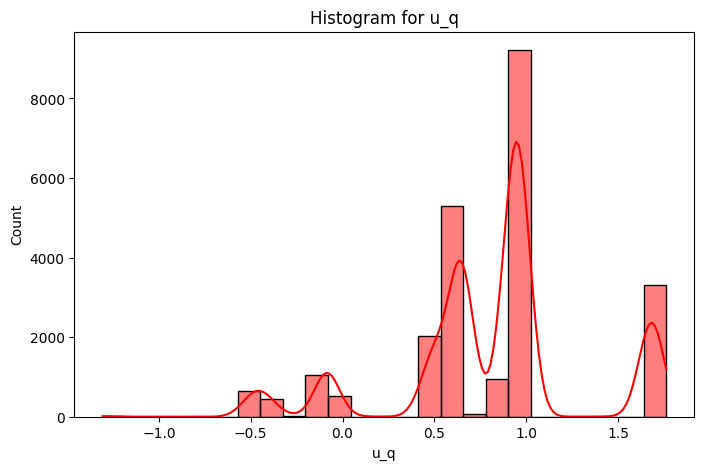

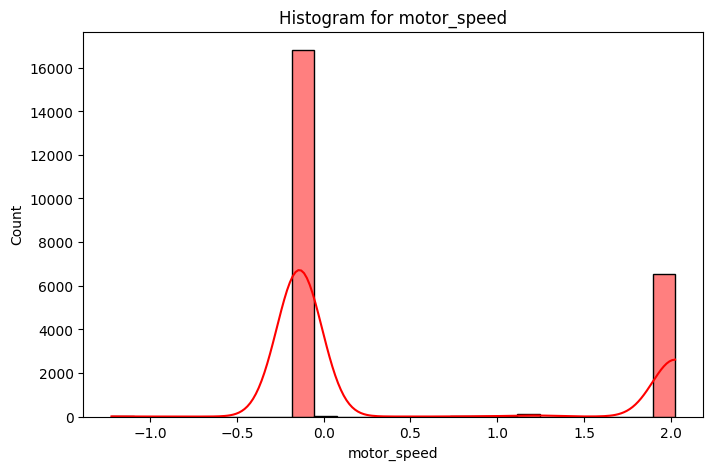

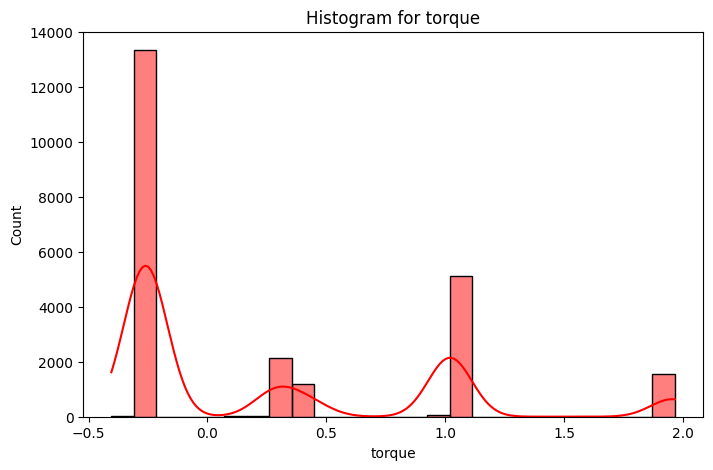

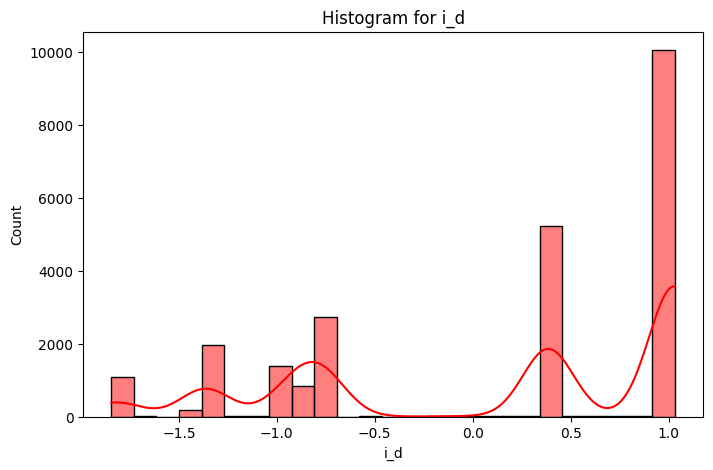

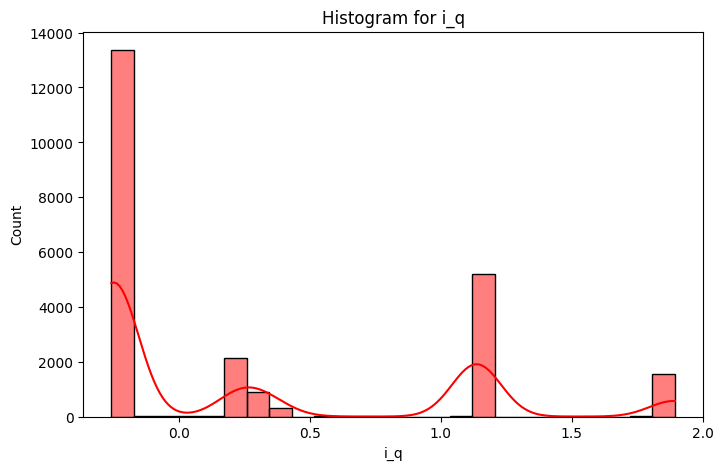

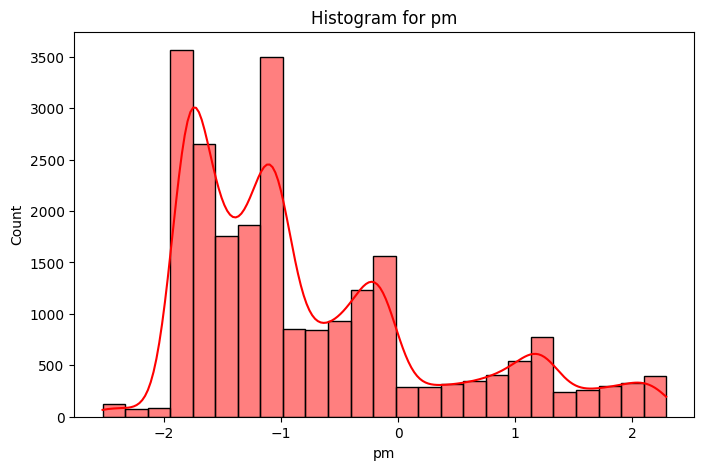

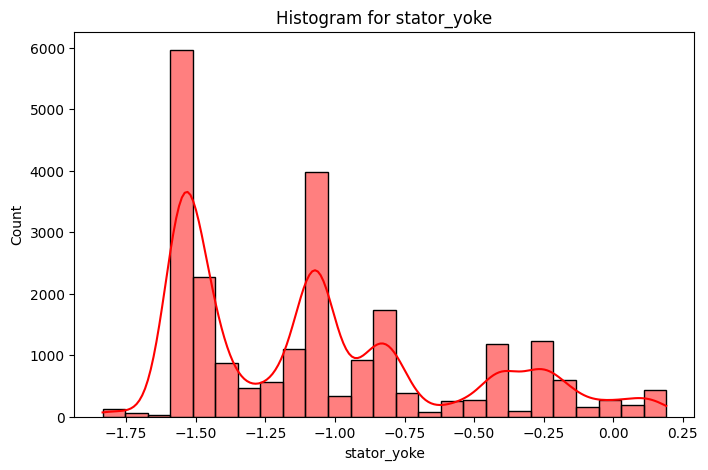

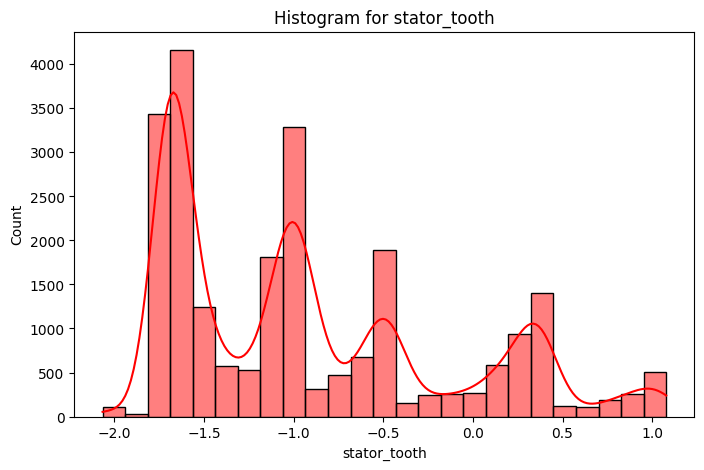

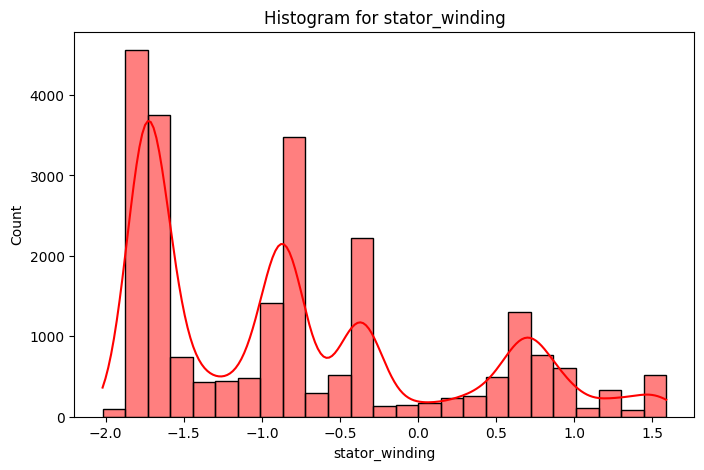

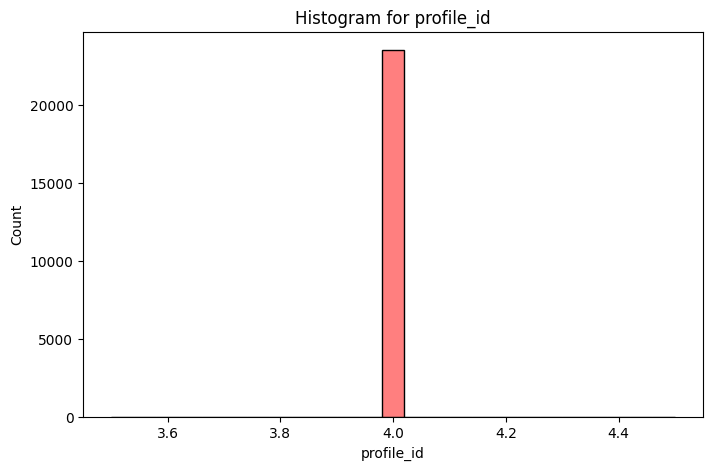

In [19]:
# Histogram
for column in td:
  plt.figure(figsize=(8, 5))
  sns.histplot(td[column], kde=True, bins=25, color='red')
  plt.title(f"Histogram for {column}")
  plt.show()

In [20]:
# compute the correlation matrix
td.corr()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
ambient,1.000000,0.241576,-0.759364,-0.685115,-0.099962,0.776393,-0.344974,0.763874,0.336750,0.549824,0.517673,0.545801,NaN
coolant,0.241576,1.000000,-0.320916,-0.279193,0.129586,0.239384,-0.272371,0.222506,0.218497,0.299336,0.298441,0.308511,NaN
u_d,-0.759364,-0.320916,1.000000,0.771141,-0.198185,-0.851220,0.653781,-0.828956,-0.437640,-0.704821,-0.698979,-0.740063,NaN
u_q,-0.685115,-0.279193,0.771141,1.000000,0.164538,-0.660426,0.301295,-0.625015,-0.399893,-0.512236,-0.491754,-0.517691,NaN
motor_speed,-0.099962,0.129586,-0.198185,0.164538,1.000000,-0.199387,-0.831802,-0.237197,0.567265,0.575008,0.633181,0.621416,NaN
torque,0.776393,0.239384,-0.851220,-0.660426,-0.199387,1.000000,-0.343180,0.996462,0.080249,0.430422,0.400333,0.460145,NaN
i_d,-0.344974,-0.272371,0.653781,0.301295,-0.831802,-0.343180,1.000000,-0.291986,-0.637143,-0.822272,-0.861645,-0.883979,NaN
i_q,0.763874,0.222506,-0.828956,-0.625015,-0.237197,0.996462,-0.291986,1.000000,0.033625,0.382245,0.349850,0.408880,NaN
pm,0.336750,0.218497,-0.437640,-0.399893,0.567265,0.080249,-0.637143,0.033625,1.000000,0.874736,0.872877,0.828597,NaN
stator_yoke,0.549824,0.299336,-0.704821,-0.512236,0.575008,0.430422,-0.822272,0.382245,0.874736,1.000000,0.995459,0.989315,NaN


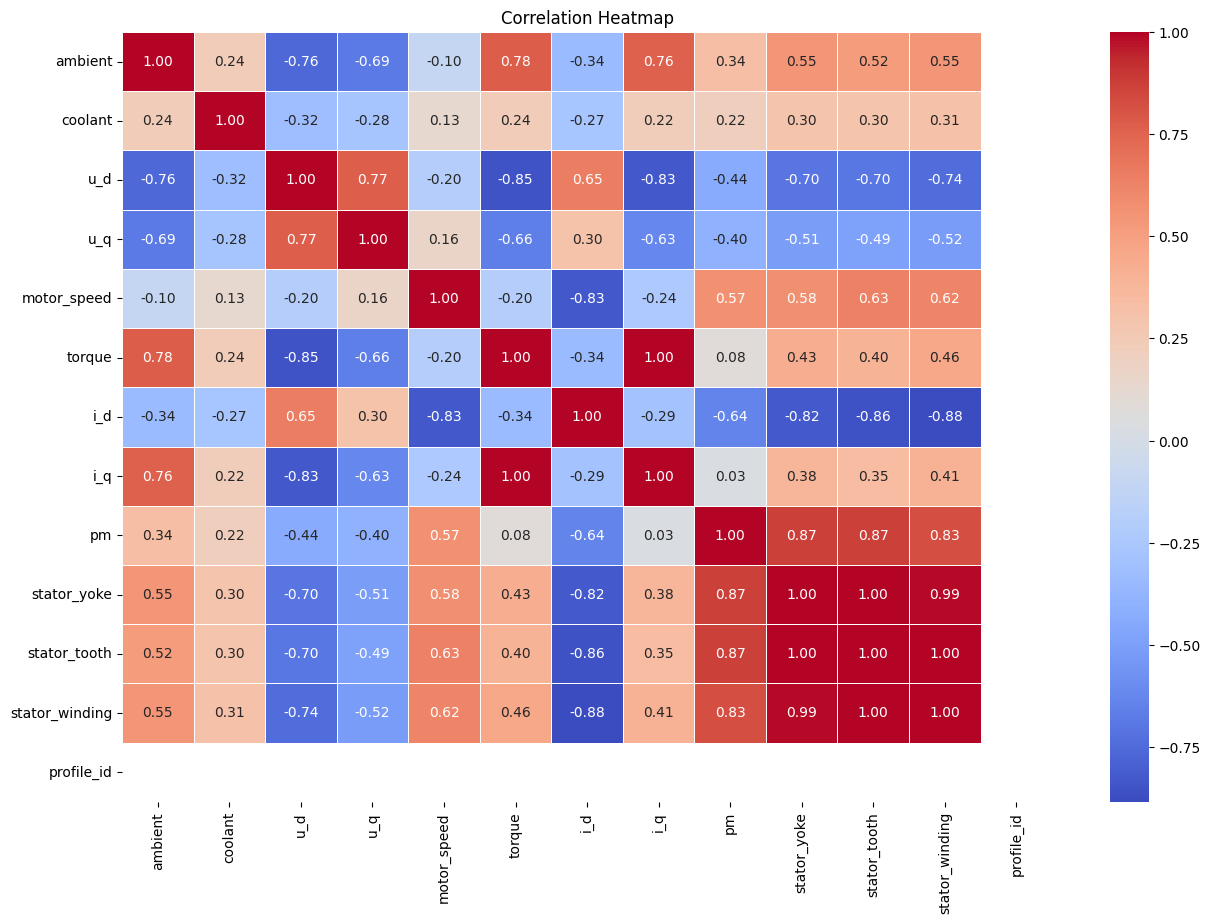

In [21]:
# plot the heatmap
plt.figure(figsize=(15,10))
sns.heatmap(td.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [22]:
# specify the coloumns wanted to  plot against'motor_speed'
columns_to_plot = ['torque', 'u_d', 'u_q', 'i_d', 'i_q', 'ambient', 'coolant']

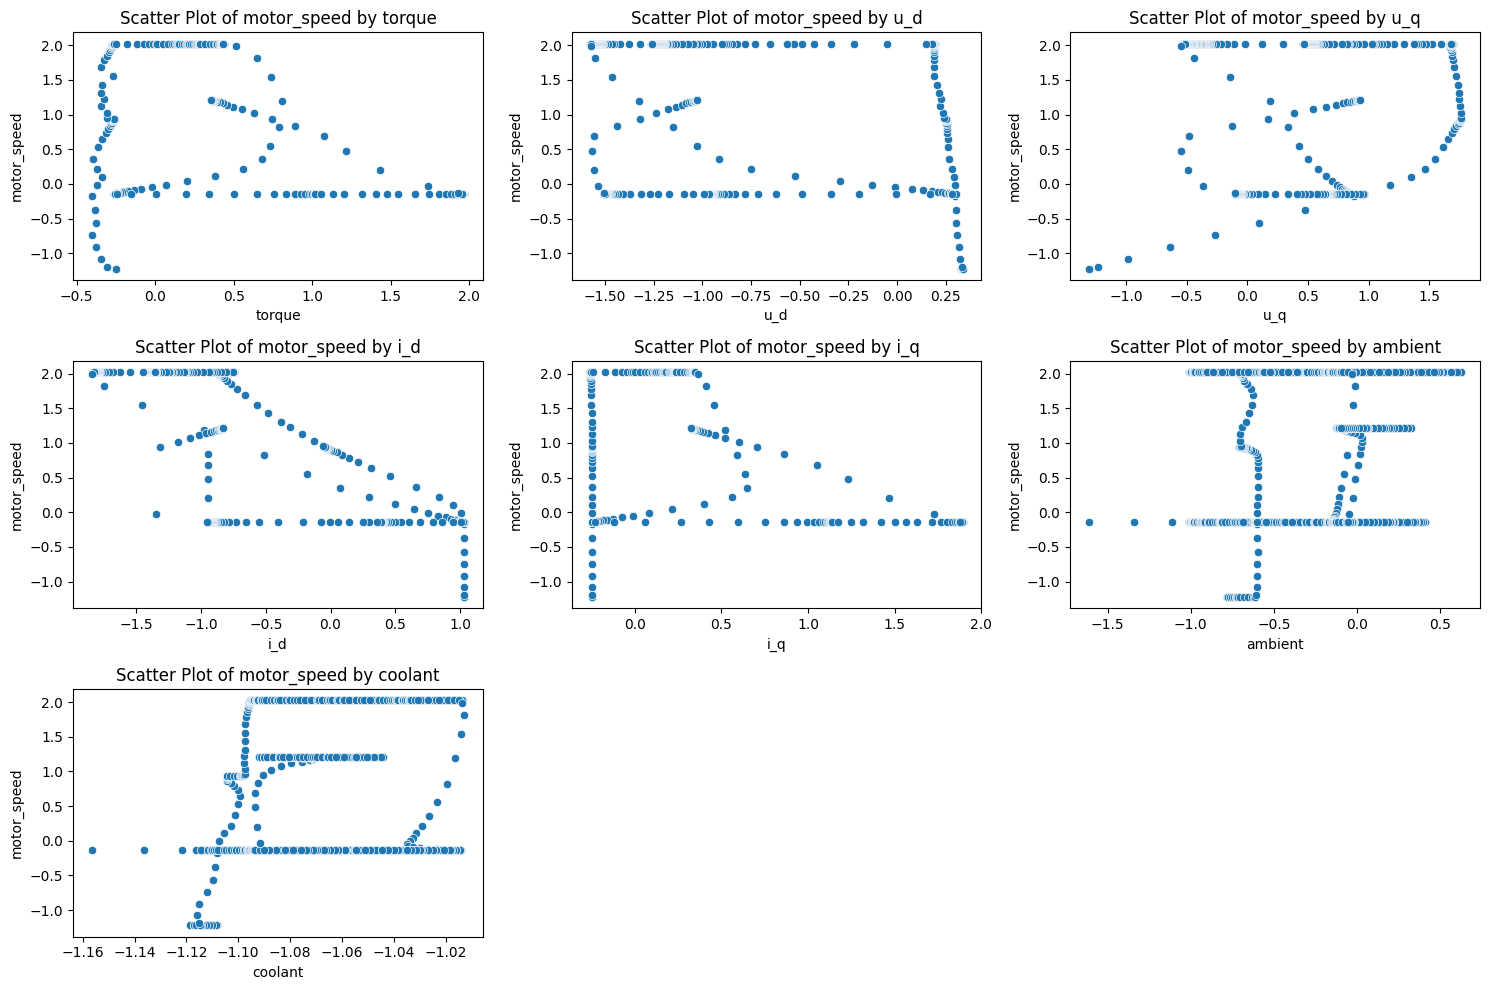

In [23]:
# creat scatter plots for these columns
plt.figure(figsize=(15,10))

for i, col in enumerate(columns_to_plot):
    plt.subplot(3,3,i+1)
    sns.scatterplot(x=col , y='motor_speed', data=td)
    plt.title(f'Scatter Plot of motor_speed by {col}')
    plt.xlabel(col)
    plt.ylabel('motor_speed')

plt.tight_layout()
plt.show()

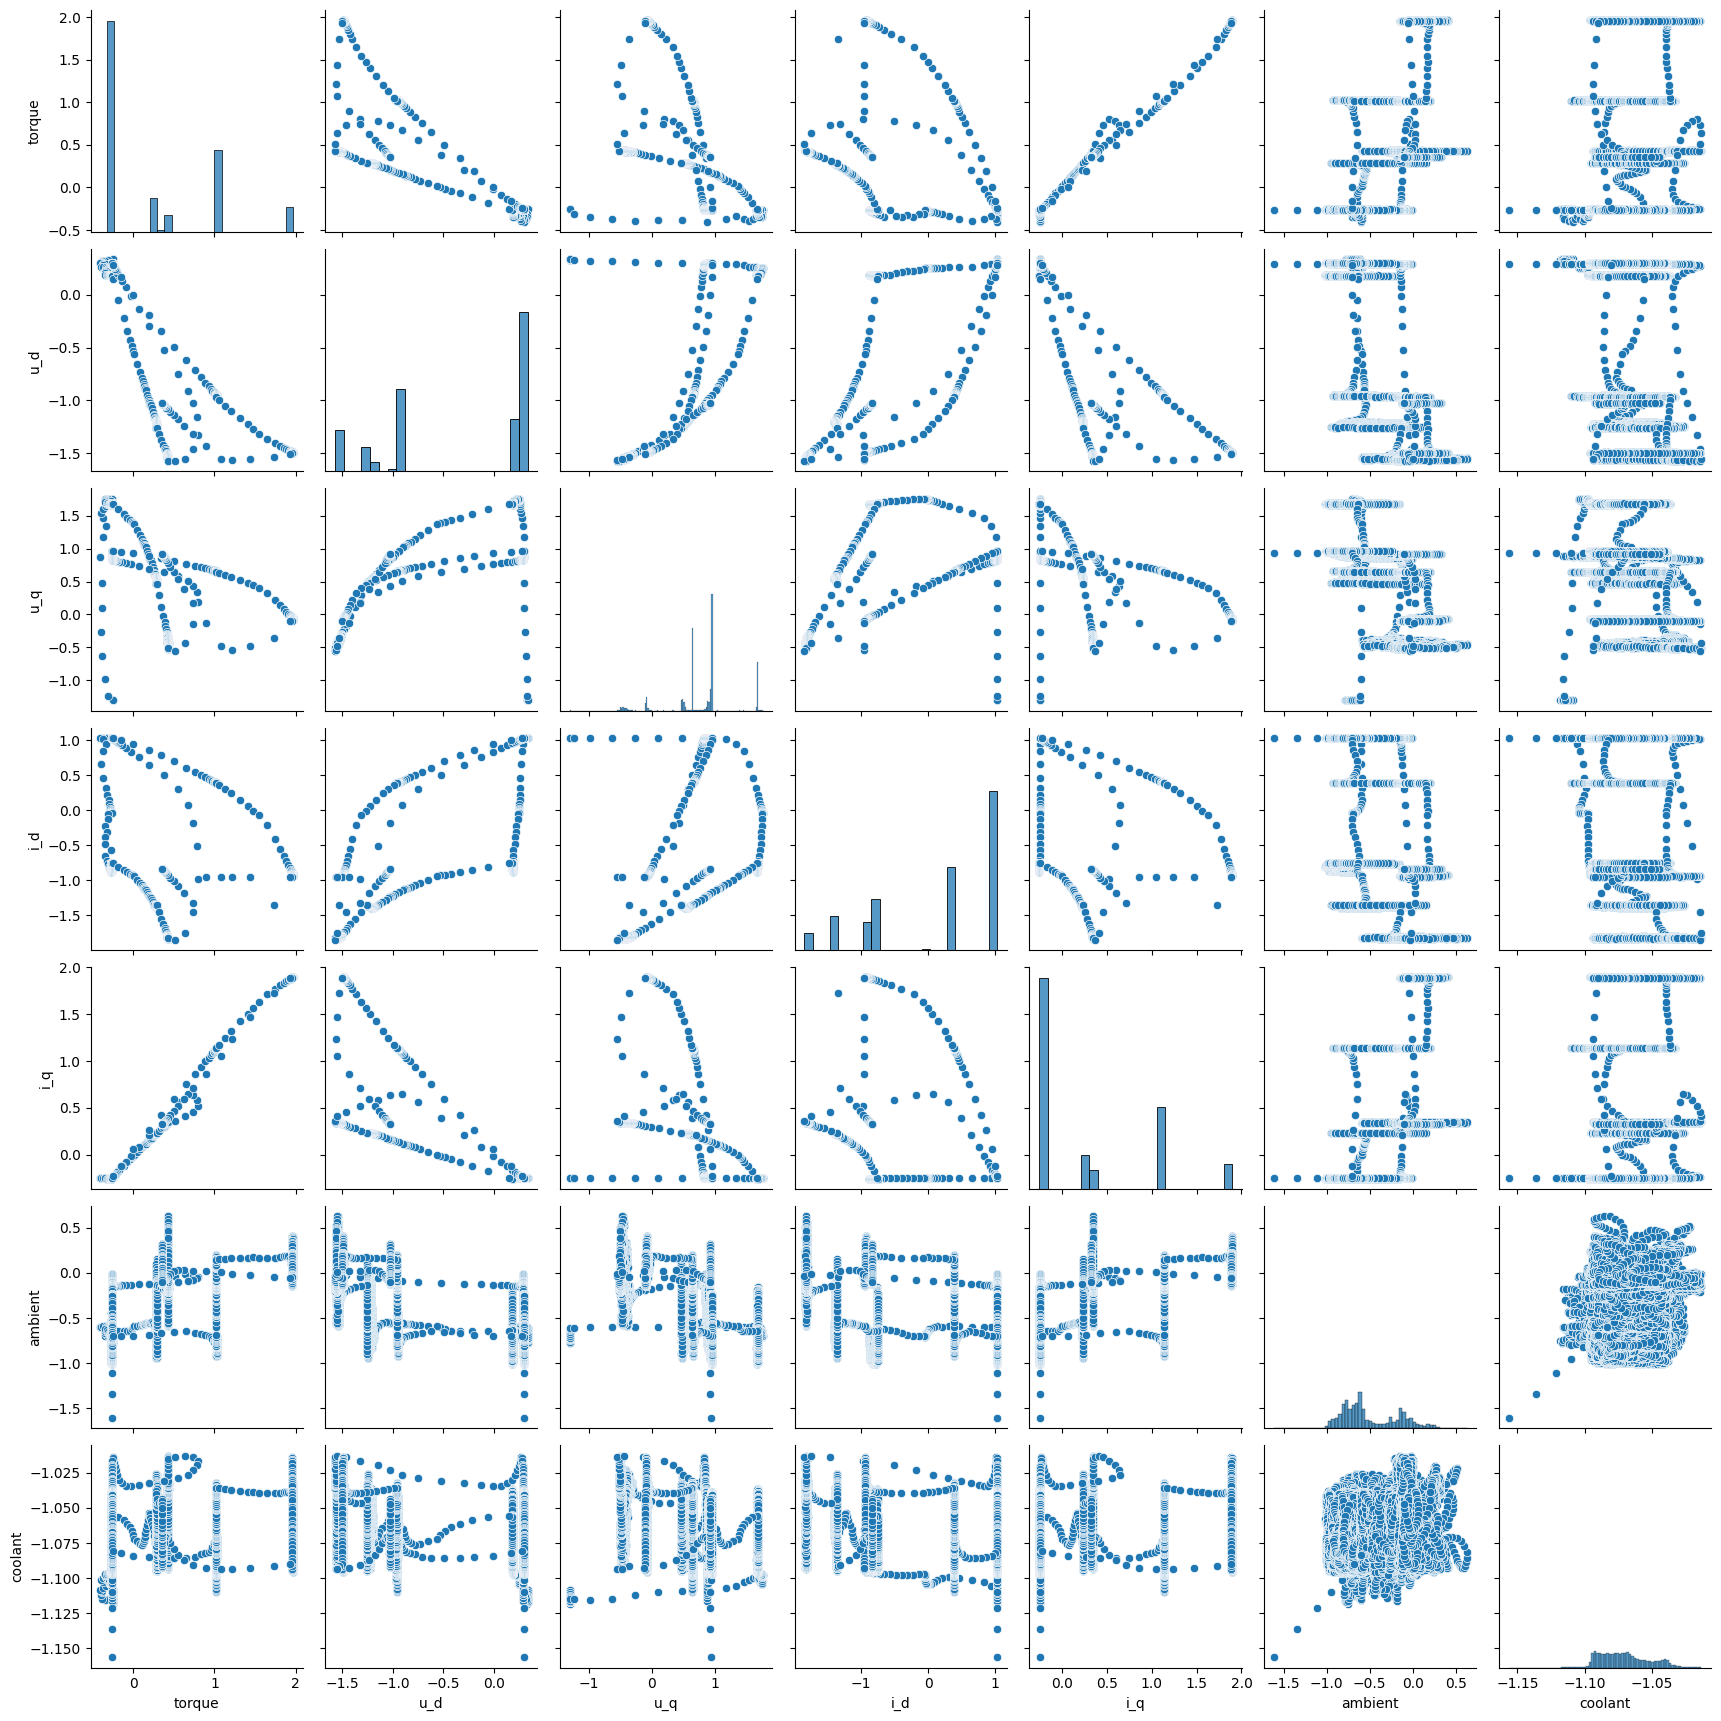

In [24]:
sns.pairplot(td[columns_to_plot])
plt.show()

In [25]:
#sns.pairplot(New_Data)

In [26]:
import statsmodels.formula.api as smf
data=td

rsq_Ambient = smf.ols("ambient ~ coolant + u_d + u_q + torque + i_d + i_q + pm + stator_yoke + stator_tooth + stator_winding + profile_id", data=data).fit().rsquared
vif_Ambient = 1/(1-rsq_Ambient)

# Change 'Profile_ID' to 'profile_id' to match the actual column name in your DataFrame
rsq_Coolant = smf.ols("coolant ~ ambient + u_d + u_q + torque + i_d + i_q + pm + stator_yoke + stator_tooth + stator_winding + profile_id", data=data).fit().rsquared
vif_Coolant = 1/(1-rsq_Coolant)

# Similarly, change 'Profile_ID' to 'profile_id' in the following formulas
rsq_Voltage_D_component = smf.ols("u_d ~ ambient + coolant + u_q + torque + i_d + i_q + pm + stator_yoke + stator_tooth + stator_winding + profile_id", data=data).fit().rsquared
vif_Voltage_D_component = 1/(1-rsq_Voltage_D_component)

rsq_Voltage_Q_component = smf.ols("u_q ~ ambient + coolant + u_d + torque + i_d + i_q + pm + stator_yoke + stator_tooth + stator_winding + profile_id", data=data).fit().rsquared
vif_Voltage_Q_component = 1/(1-rsq_Voltage_Q_component)

rsq_Torque = smf.ols("torque ~ ambient + coolant + u_q + u_q + i_d + i_q + pm + stator_yoke + stator_tooth + stator_winding + profile_id", data=data).fit().rsquared
vif_Torque = 1/(1-rsq_Torque)

rsq_Current_Q_component = smf.ols("i_q ~ ambient + coolant + u_q + u_q + torque + i_d + pm + stator_yoke + stator_tooth + stator_winding + profile_id", data=data).fit().rsquared
vif_Current_Q_component = 1/(1-rsq_Current_Q_component)

rsq_Current_D_component = smf.ols("i_d ~ ambient + coolant + u_q + u_q + torque + i_q + pm + stator_yoke + stator_tooth + stator_winding + profile_id", data=data).fit().rsquared
vif_Current_D_component = 1/(1-rsq_Current_D_component)

rsq_PMST = smf.ols("pm ~ ambient + coolant + u_q + u_q + torque + i_q + i_d + stator_yoke + stator_tooth + stator_winding + profile_id", data=data).fit().rsquared
vif_PMST = 1/(1-rsq_PMST)

rsq_Stator_Yoke = smf.ols("stator_yoke ~ ambient + coolant + u_q + u_q + torque + i_q + i_d + pm + stator_tooth + stator_winding + profile_id", data=data).fit().rsquared
vif_Stator_Yoke = 1/(1-rsq_Stator_Yoke)

rsq_Stator_Tooth = smf.ols("stator_tooth ~ ambient + coolant + u_q + u_q + torque + i_q + i_d + pm + stator_yoke + stator_winding + profile_id", data=data).fit().rsquared
vif_Stator_Tooth = 1/(1-rsq_Stator_Tooth)

rsq_Stator_Winding = smf.ols("stator_winding ~ ambient + coolant + u_q + u_q + torque + i_q + i_d + pm + stator_yoke + stator_tooth + profile_id", data=data).fit().rsquared
vif_Stator_Winding = 1/(1-rsq_Stator_Winding)

rsq_Profile_ID = smf.ols("profile_id ~ ambient + coolant + u_q + u_q + torque + i_q + i_d + pm + stator_yoke + stator_winding + stator_tooth", data=data).fit().rsquared # Change 'Profile_ID' to 'profile_id'
vif_Profile_ID = 1/(1-rsq_Profile_ID)

In [27]:
VIF= {"Variables":['Ambient','Coolant','Voltage_D_component','Voltage_Q_component','Torque','Current_Q_component','Current_D_component','PMST','Stator_Yoke','Stator_Winding','Stator_Tooth','Profile_ID'],
      'VIF':[vif_Ambient, vif_Coolant, vif_Voltage_D_component, vif_Voltage_Q_component, vif_Torque, vif_Current_Q_component, vif_Current_D_component, vif_PMST, vif_Stator_Yoke, vif_Stator_Winding, vif_Stator_Tooth, vif_Profile_ID]}
VIF_df = pd.DataFrame(VIF)
VIF_df

,Variables,VIF
0,Ambient,3.424385
1,Coolant,1.130731
2,Voltage_D_component,34.280853
3,Voltage_Q_component,12.779741
4,Torque,556.689244
5,Current_Q_component,477.639475
6,Current_D_component,20.288058
7,PMST,21.280615
8,Stator_Yoke,388.116329
9,Stator_Winding,1040.966874


In [28]:
VIF_df[VIF_df.VIF>10]

,Variables,VIF
2,Voltage_D_component,34.280853
3,Voltage_Q_component,12.779741
4,Torque,556.689244
5,Current_Q_component,477.639475
6,Current_D_component,20.288058
7,PMST,21.280615
8,Stator_Yoke,388.116329
9,Stator_Winding,1040.966874
10,Stator_Tooth,1303.014236


In [29]:
len(VIF_df[VIF_df.VIF>10])

9

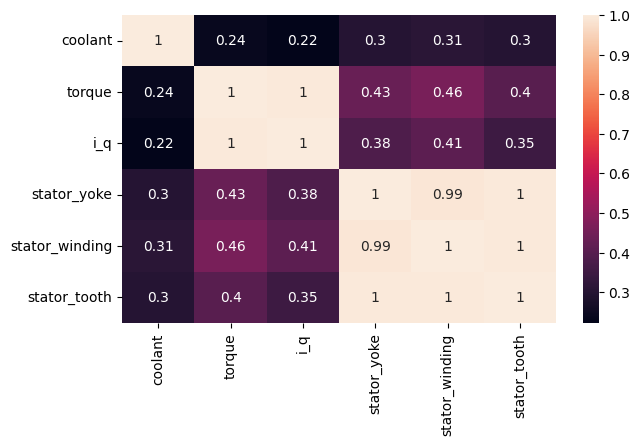

In [30]:
plt.figure(figsize=(7,4))
sns.heatmap(td[["coolant","torque","i_q","stator_yoke","stator_winding","stator_tooth"]].corr(),annot=True,color="white")
plt.show()

In [31]:
final_Data = td.copy()

In [32]:
final_Data=final_Data.drop(columns=['torque','stator_yoke','stator_tooth'],axis=1)
final_Data

,ambient,coolant,u_d,u_q,motor_speed,i_d,i_q,pm,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,1.029572,-0.245860,-2.522071,-2.018033,4.0
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,1.029509,-0.245832,-2.522418,-2.017631,4.0
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,1.029448,-0.245818,-2.522673,-2.017343,4.0
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,1.032845,-0.246955,-2.521639,-2.017632,4.0
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,1.031807,-0.246610,-2.521900,-2.018145,4.0
...,...,...,...,...,...,...,...,...,...,...
23545,-0.060896,-1.062320,-1.028410,0.922917,1.212484,-0.832397,0.323461,-0.037740,0.538742,4.0
23546,-0.071967,-1.059155,-1.027808,0.924254,1.212480,-0.831477,0.323321,-0.037644,0.533634,4.0
23547,-0.084551,-1.054594,-1.028349,0.922122,1.212480,-0.831317,0.323422,-0.036790,0.528910,4.0
23548,-0.097951,-1.050203,-1.028019,0.923719,1.212480,-0.830752,0.323157,-0.036050,0.525644,4.0


In [33]:
#From above vif observation we came to the conclusion that out of 13 features 7 features are independent of each other and
#remaining 6  features are dependent on each other so we for optimized result we will reselect the features for our model

# **Modeln Building**

In [34]:
model0 = smf.ols("motor_speed ~ ambient+coolant + u_d + u_q + i_d + i_q + pm  + stator_winding", data=final_Data).fit()

In [35]:
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            motor_speed   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 4.462e+05
Date:                Mon, 10 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:16:55   Log-Likelihood:                 26490.
No. Observations:               23549   AIC:                        -5.296e+04
Df Residuals:                   23540   BIC:                        -5.289e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0175      0.032     -0.544      0.586      -0.081       0.046
ambient           -0.0119      0.003     -4.078      0.000      -0.018      -0.006
coolant            0.0696      0.030      2.305      0.021       0.010       0.129
u_d               -0.7139      0.003   -239.645      0.000      -0.720      -0.708
u_q                0.7836      0.002    386.010      0.000       0.780       0.788
i_d               -0.8287      0.002   -452.784      0.000      -0.832      -0.825
i_q               -0.8670      0.002   -361.554      0.000      -0.872      -0.862
pm                 0.0607      0.001     43.751      0.000       0.058       0.063
stator_winding    -0.0904      0.003    -34.691      0.000      -0.096      -0.085
==============================================================================
Omnibus:                     6460.500   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           202846.377
Skew:                          -0.685   Prob(JB):                         0.00
Kurtosis:                      17.313   Cond. No.                         203.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
model0.params

,0
Intercept,-0.017543
ambient,-0.011861
coolant,0.069573
u_d,-0.713920
u_q,0.783566
i_d,-0.828694
i_q,-0.867008
pm,0.060675
stator_winding,-0.090393


In [37]:
model0.predict()

array([-1.94815946, -1.94896311, -1.95426288, ...,  1.72580463,
        1.72524597,  1.72682776])

**Building Model Using All Features**

In [38]:
first_model = smf.ols('motor_speed ~ ambient + coolant + u_d + u_q + torque + i_d + i_q + pm + stator_yoke + stator_tooth + stator_winding', data=td).fit()

In [39]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            motor_speed   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.237e+06
Date:                Mon, 10 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:16:56   Log-Likelihood:                 49161.
No. Observations:               23549   AIC:                        -9.830e+04
Df Residuals:                   23537   BIC:                        -9.820e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4090      0.013     31.628      0.000       0.384       0.434
ambient           -0.0309      0.001    -27.760      0.000      -0.033      -0.029
coolant            0.1431      0.012     12.397      0.000       0.120       0.166
u_d               -0.3097      0.002   -196.588      0.000      -0.313      -0.307
u_q                0.3813      0.001    277.497      0.000       0.379       0.384
torque            -2.9147      0.009   -340.057      0.000      -2.931      -2.898
i_d               -1.0153      0.001   -914.076      0.000      -1.017      -1.013
i_q                2.0599      0.008    243.354      0.000       2.043       2.076
pm                 0.0148      0.001     17.815      0.000       0.013       0.016
stator_yoke       -0.3709      0.008    -46.295      0.000      -0.387      -0.355
stator_tooth       0.5141      0.009     56.417      0.000       0.496       0.532
stator_winding    -0.2392      0.007    -36.126      0.000      -0.252      -0.226
==============================================================================
Omnibus:                    28241.276   Durbin-Watson:                   0.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7647994.411
Skew:                          -6.136   Prob(JB):                         0.00
Kurtosis:                      90.429   Cond. No.                         252.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
first_model.params

,0
Intercept,0.409032
ambient,-0.030889
coolant,0.143099
u_d,-0.309737
u_q,0.381326
torque,-2.914686
i_d,-1.015251
i_q,2.059882
pm,0.014817
stator_yoke,-0.370872


In [41]:
first_model.predict()

array([-1.08436759, -1.08658796, -1.08763922, ...,  1.46399133,
        1.45970875,  1.45791847])

**Calculating Z-Score to eliminatethe outliers in the given dataset**

In [42]:
# Load the data into a Pandas DataFrame
final_csv= pd.read_csv('temperature_data (1).csv')

# Calculate the Z-scores for each column
z_scores = np.abs(final_csv - final_csv.mean()) / final_csv.std()

# Define a threshold value (e.g. 3 standard deviations)
threshold = 3

# Identify the rows that have any column with a Z-score greater than the threshold
outliers = (z_scores > threshold).any(axis=1)

# Remove the outliers
final_csv = final_csv[~outliers]

# Save the cleaned data to a new file
final_csv.to_csv('cleaned_data.csv', index=False)


In [43]:
Project_Data=pd.read_csv("cleaned_data.csv")

In [44]:
Project_Data.shape

(44403, 13)

In [45]:
Project_Data

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4.0
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4.0
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4.0
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4.0
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44398,-0.159006,0.760022,-1.150964,0.727221,1.483030,0.342606,-1.014847,0.310116,1.353642,0.766704,0.890720,0.910992,6.0
44399,-0.158855,0.765261,-1.151039,0.725782,1.483026,0.341968,-1.014751,0.309717,1.353717,0.771647,0.890147,0.909099,6.0
44400,-0.157245,0.769497,-1.151491,0.723849,1.483025,0.342190,-1.014152,0.309556,1.353960,0.774430,0.889959,0.910538,6.0
44401,-0.151108,0.774405,-1.153497,0.721367,1.483028,0.342176,-1.013324,0.309747,1.354030,0.777183,0.891023,0.913394,6.0


In [46]:
Project_Data=Project_Data[['motor_speed','ambient', 'coolant', 'u_d', 'u_q', 'torque', 'i_d',
       'i_q', 'pm', 'stator_yoke', 'stator_tooth', 'stator_winding',
       'profile_id']]
Project_Data

,motor_speed,ambient,coolant,u_d,u_q,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-1.222428,-0.752143,-1.118446,0.327935,-1.297858,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4.0
1,-1.222429,-0.771263,-1.117021,0.329665,-1.297686,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4.0
2,-1.222428,-0.782892,-1.116681,0.332771,-1.301822,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4.0
3,-1.222430,-0.780935,-1.116764,0.333700,-1.301852,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4.0
4,-1.222429,-0.774043,-1.116775,0.335206,-1.303118,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44398,1.483030,-0.159006,0.760022,-1.150964,0.727221,0.342606,-1.014847,0.310116,1.353642,0.766704,0.890720,0.910992,6.0
44399,1.483026,-0.158855,0.765261,-1.151039,0.725782,0.341968,-1.014751,0.309717,1.353717,0.771647,0.890147,0.909099,6.0
44400,1.483025,-0.157245,0.769497,-1.151491,0.723849,0.342190,-1.014152,0.309556,1.353960,0.774430,0.889959,0.910538,6.0
44401,1.483028,-0.151108,0.774405,-1.153497,0.721367,0.342176,-1.013324,0.309747,1.354030,0.777183,0.891023,0.913394,6.0


In [47]:
Project_Data=Project_Data.drop(columns=['torque','stator_yoke','stator_tooth','profile_id'])
Project_Data

,motor_speed,ambient,coolant,u_d,u_q,i_d,i_q,pm,stator_winding
0,-1.222428,-0.752143,-1.118446,0.327935,-1.297858,1.029572,-0.245860,-2.522071,-2.018033
1,-1.222429,-0.771263,-1.117021,0.329665,-1.297686,1.029509,-0.245832,-2.522418,-2.017631
2,-1.222428,-0.782892,-1.116681,0.332771,-1.301822,1.029448,-0.245818,-2.522673,-2.017343
3,-1.222430,-0.780935,-1.116764,0.333700,-1.301852,1.032845,-0.246955,-2.521639,-2.017632
4,-1.222429,-0.774043,-1.116775,0.335206,-1.303118,1.031807,-0.246610,-2.521900,-2.018145
...,...,...,...,...,...,...,...,...,...
44398,1.483030,-0.159006,0.760022,-1.150964,0.727221,-1.014847,0.310116,1.353642,0.910992
44399,1.483026,-0.158855,0.765261,-1.151039,0.725782,-1.014751,0.309717,1.353717,0.909099
44400,1.483025,-0.157245,0.769497,-1.151491,0.723849,-1.014152,0.309556,1.353960,0.910538
44401,1.483028,-0.151108,0.774405,-1.153497,0.721367,-1.013324,0.309747,1.354030,0.913394


**Splitting the data into X and Y**

In [48]:
X=Project_Data.iloc[:,1:]
Y=Project_Data.iloc[:,0]

In [49]:
X

,ambient,coolant,u_d,u_q,i_d,i_q,pm,stator_winding
0,-0.752143,-1.118446,0.327935,-1.297858,1.029572,-0.245860,-2.522071,-2.018033
1,-0.771263,-1.117021,0.329665,-1.297686,1.029509,-0.245832,-2.522418,-2.017631
2,-0.782892,-1.116681,0.332771,-1.301822,1.029448,-0.245818,-2.522673,-2.017343
3,-0.780935,-1.116764,0.333700,-1.301852,1.032845,-0.246955,-2.521639,-2.017632
4,-0.774043,-1.116775,0.335206,-1.303118,1.031807,-0.246610,-2.521900,-2.018145
...,...,...,...,...,...,...,...,...
44398,-0.159006,0.760022,-1.150964,0.727221,-1.014847,0.310116,1.353642,0.910992
44399,-0.158855,0.765261,-1.151039,0.725782,-1.014751,0.309717,1.353717,0.909099
44400,-0.157245,0.769497,-1.151491,0.723849,-1.014152,0.309556,1.353960,0.910538
44401,-0.151108,0.774405,-1.153497,0.721367,-1.013324,0.309747,1.354030,0.913394


In [50]:
Y

,motor_speed
0,-1.222428
1,-1.222429
2,-1.222428
3,-1.222430
4,-1.222429
...,...
44398,1.483030
44399,1.483026
44400,1.483025
44401,1.483028


In [51]:
!pip install scikit-learn

from sklearn.model_selection import train_test_split

X=Project_Data.iloc[:,1:]
Y=Project_Data.iloc[:,0]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=10)

In [52]:
from sklearn.tree import DecisionTreeRegressor
DTmodel = DecisionTreeRegressor(max_depth=3,splitter='best',random_state=10,max_features=None)
DTmodel.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=3, random_state=10)

In [53]:
Y_pred=DTmodel.predict(X_test)

In [54]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error of the predictions
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.004133164577777548


In [55]:
from sklearn.metrics import mean_absolute_error

# Calculate the mean Absolute Error of the prediction
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.029409685909712952


In [56]:
from sklearn.metrics import r2_score
# Calculate the Rsquare value of the prediction
r2 = r2_score(Y_test, Y_pred)
print("R-squared:", r2)

R-squared: 0.9963102683723248


In [57]:
# Calculate root mean square error
RMSE=np.sqrt(mse)
print("RMSE:", RMSE)

RMSE: 0.06428969262469333


In [58]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculate Mean Absolute Percentage Error (MAPE)
MAPE = mean_absolute_percentage_error(Y_test, Y_pred)
print('MAPE:', MAPE)

MAPE: 0.023297403568763215


In [59]:
DecisionTree_Results=pd.DataFrame({
'Attribute':['Regressor','MSE','MAE','R-Square','RMSE','Mape'],'Value':['Decision_TreeRegressor',mse,mae,r2,RMSE,MAPE]})

In [60]:
DecisionTree_Results

,Attribute,Value
0,Regressor,Decision_TreeRegressor
1,MSE,0.004133
2,MAE,0.02941
3,R-Square,0.99631
4,RMSE,0.06429
5,Mape,0.023297


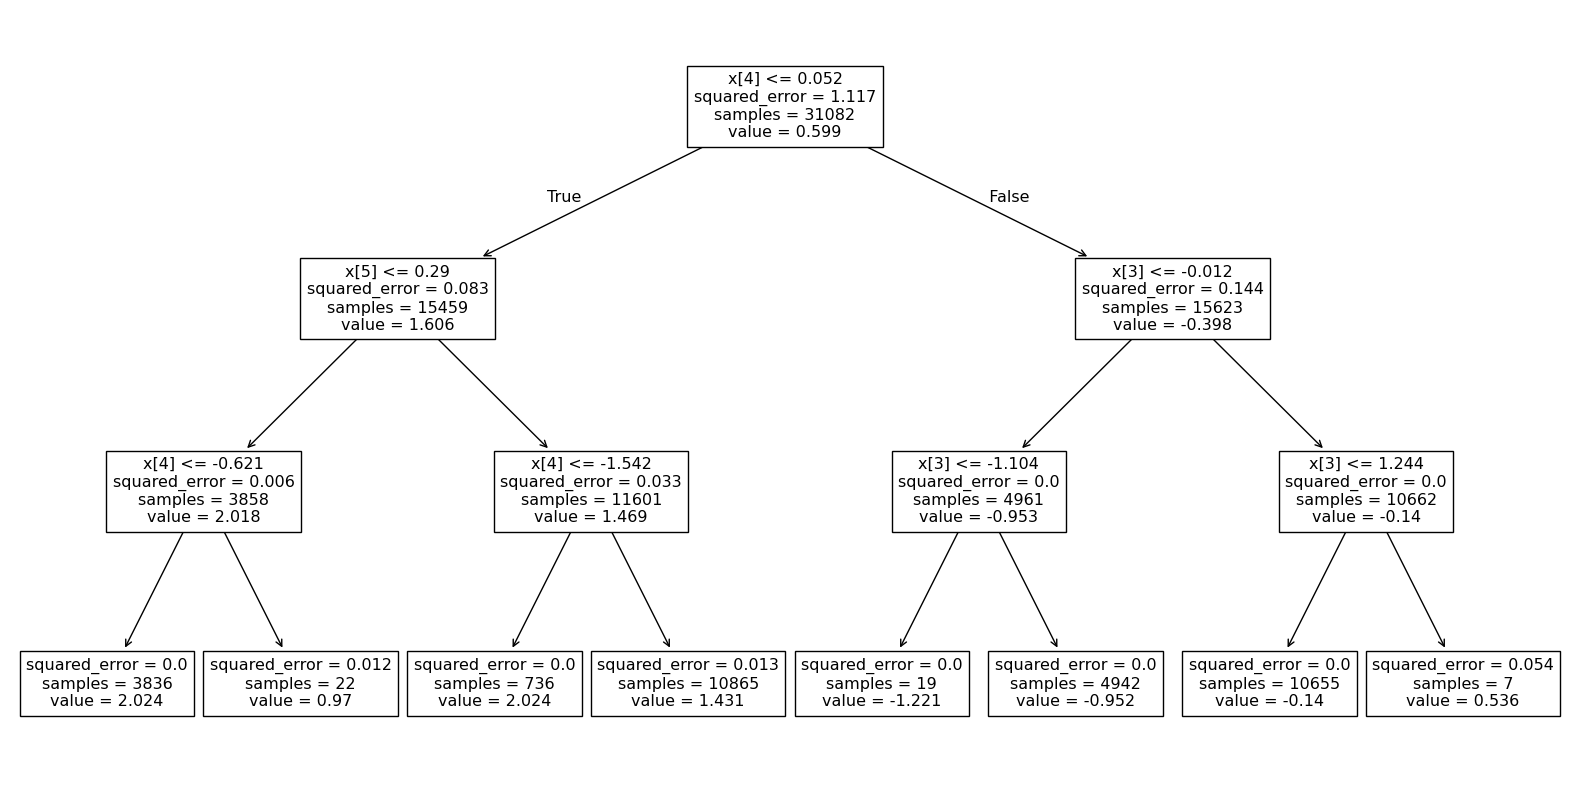

In [61]:
#ploting Decision Tree
from sklearn import tree
plt.figure(figsize=(20, 10))
tree.plot_tree(DTmodel)
plt.show()

**Implementing Grid Search**

In [65]:
# define the parameter grid
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [1, 2, 3, 4, 5],
              'min_samples_split': [2, 4, 6, 8, 10]}

# create the grid search object
DTgrid_search = GridSearchCV(DTmodel, param_grid, cv=5)

# fit the grid search to the data
DTgrid_search.fit(X_train, Y_train)

# Get the Best Parameters
print("Best parameters:", DTgrid_search.best_params_)
print("Best score:", DTgrid_search.best_score_)

Best parameters: {'max_depth': 5, 'min_samples_split': 2}
Best score: 0.9998693798423208


**Implementing best parameters**

In [66]:
#building model with hypermetune parameters
GridDTmodel = DecisionTreeRegressor(max_depth=5,splitter='best',random_state=10,max_features=None,min_samples_split= 2)
GridDTmodel.fit(X_train, Y_train)


DecisionTreeRegressor(max_depth=5, random_state=10)

In [67]:
GDY_pred=GridDTmodel.predict(X_test)

In [68]:
#Calculating The optimized values
GDmse = mean_squared_error(Y_test, GDY_pred)
print("Mean Squared Error:", GDmse)
GDmae = mean_absolute_error(Y_test, GDY_pred)
print("Mean Absolute Error:", GDmae)
GDr2 = r2_score(Y_test, GDY_pred)
print("R-squared:", r2)
GDRMSE=np.sqrt(GDmse)
print("RMSE:", GDRMSE)

Mean Squared Error: 0.00012842574202041835
Mean Absolute Error: 0.000569676588722823
R-squared: 0.9963102683723248
RMSE: 0.01133250819635346


In [69]:
Evaluation=pd.DataFrame(columns = ['Model', 'R_square', 'Mean_Squared_Error', 'Mean_Absolute_Error', 'Root_Mean_Squared_Error','Mean_Absolute_Percentage_Error'])

In [70]:
L2=["DecisionTreeRegressor", GDr2, GDmse, GDmae, GDRMSE,'Nan']
Evaluation.loc[len (Evaluation), :]=L2
Evaluation

,Model,R_square,Mean_Squared_Error,Mean_Absolute_Error,Root_Mean_Squared_Error,Mean_Absolute_Percentage_Error
0,DecisionTreeRegressor,0.999885,0.000128,0.00057,0.011333,Nan


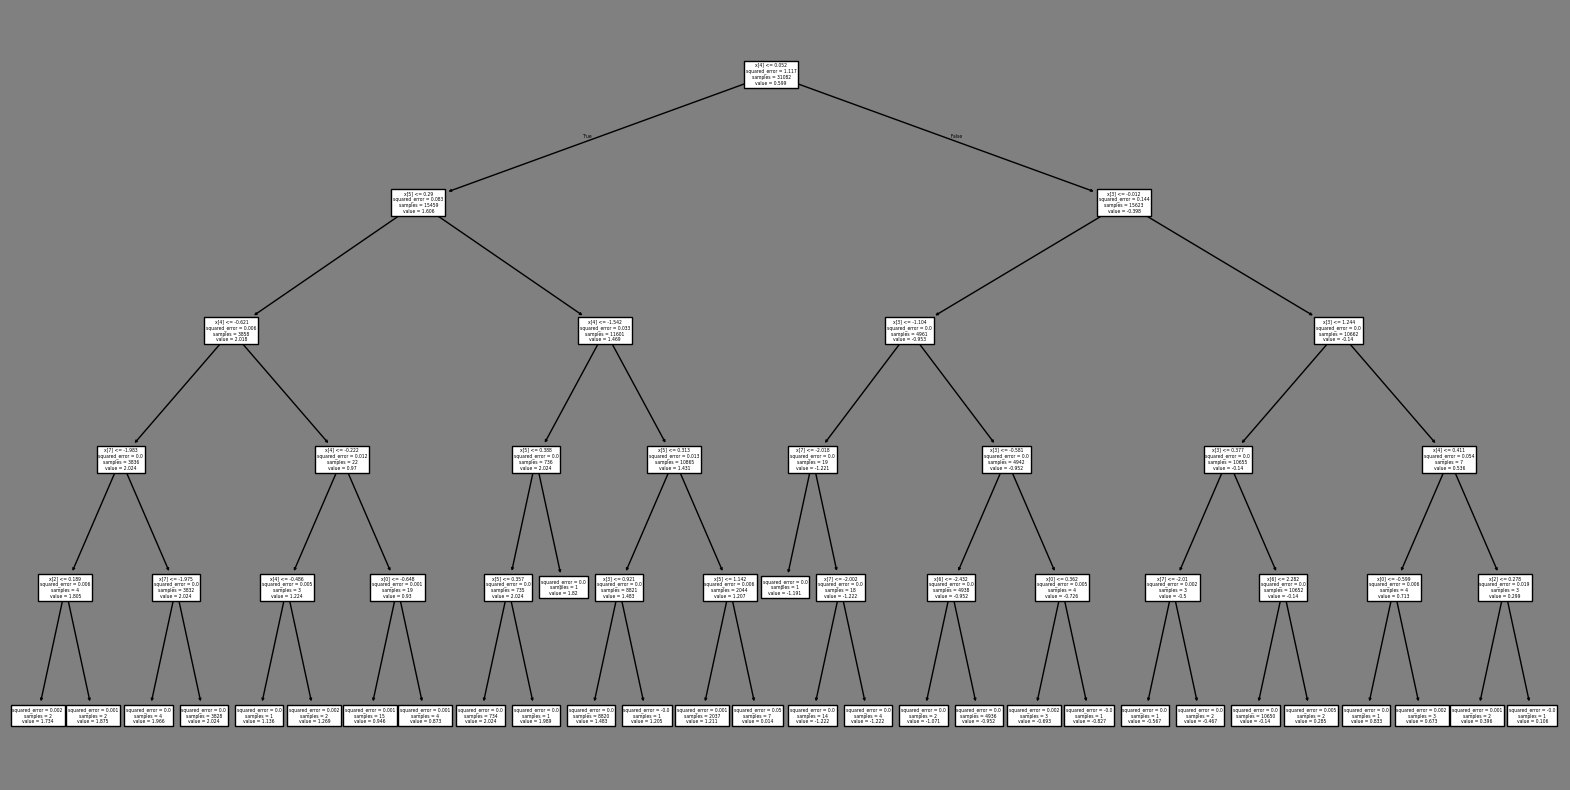

In [71]:
#Ploting again the optimized Decision Tree
plt.figure(figsize=(20, 10),facecolor='grey')
tree.plot_tree(GridDTmodel)
plt.show()

In [72]:
from sklearn.ensemble import RandomForestRegressor

RFmodel = RandomForestRegressor(max_depth=3, random_state=10, max_features='sqrt')
RFmodel.fit(X_train, Y_train)

RandomForestRegressor(max_depth=3, max_features='sqrt', random_state=10)

In [73]:
RFY_pred=RFmodel.predict(X_test)

In [78]:
# Calculate the mean squared error of the predictions
RFmse = mean_squared_error(Y_test, RFY_pred)
print("Mean Squared Error:", RFmse)

Mean Squared Error: 0.017598652311797098


In [74]:
# Calculate the mean Absolute Error of the prediction
RFmae = mean_absolute_error(Y_test, RFY_pred)
print("Mean Absolute Error:", RFmae)

Mean Absolute Error: 0.0855315778785897


In [75]:
# Calculate the Rsquare value of the prediction
RFr2 = r2_score(Y_test, RFY_pred)
print("R-squared:", RFr2)

R-squared: 0.9842894463026166


In [79]:
# Calculate root mean square error
RF_RMSE=np.sqrt(RFmse)
print("RMSE:", RF_RMSE)


RMSE: 0.13265991222595128


In [80]:
from sklearn.metrics import mean_absolute_percentage_error

RF_MAPE = mean_absolute_percentage_error(Y_test, RFY_pred)
print("MAPE:", RF_MAPE)

MAPE: 0.1285722417156241


In [81]:
RandomForest_Results=pd.DataFrame({
'Attribute':['Regressor','MSE','MAE','R-Square','RMSE','Mape'],'Value':['RandomForest_Regressor',RFmse,RFmae,RFr2,RF_RMSE,RF_MAPE]})

In [82]:
RandomForest_Results

,Attribute,Value
0,Regressor,RandomForest_Regressor
1,MSE,0.017599
2,MAE,0.085532
3,R-Square,0.984289
4,RMSE,0.13266
5,Mape,0.128572


In [83]:
#get optmized result using randomized search parameter
Random_RF_Model = RandomForestRegressor(max_depth=20,
                                        n_estimators=75,
                                        min_samples_split=3,
                                        min_samples_leaf=3,
                                        random_state=0,
                                        max_features='sqrt')
Random_RF_Model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=3, n_estimators=75, random_state=0)

In [84]:
Random_RF_Y_predicted = Random_RF_Model.predict(X_test)

In [85]:
Random_RF_MSE = mean_squared_error(Y_test, Random_RF_Y_predicted)
Random_RF_RMSE = np.sqrt(Random_RF_MSE)
Random_RF_MAE = mean_absolute_error(Y_test, Random_RF_Y_predicted)
Random_RF_MAPE = mean_absolute_percentage_error(Y_test, Random_RF_Y_predicted)
Random_RF_r_score = r2_score(Y_test, Random_RF_Y_predicted)


In [86]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Create the base regressor
Base_Regressor = DecisionTreeRegressor(max_depth=5)

# Create the AdaBoost Regressor, replace 'base_estimator' with 'estimator'
Ada_Boost_Regressor = AdaBoostRegressor(estimator=Base_Regressor, n_estimators=100)

# Fit the regressor
Ada_Boost_Regressor.fit(X_train, Y_train)

# Predict using the AdaBoost regressor
Ada_Boost_Y_pred = Ada_Boost_Regressor.predict(X_test)

# Calculate the mean squared error
Ada_Bost_MSE = mean_squared_error(Y_test, Ada_Boost_Y_pred)

# Calculate the Root mean squared error
Ada_Bost_RMSE = np.sqrt(Ada_Bost_MSE)

# Calculate the mean absolutate error
Ada_Bost_MAE = mean_absolute_error(Y_test, Ada_Boost_Y_pred)

# Calculate the mean absolutate percentage error
Ada_Bost_MAPE = mean_absolute_percentage_error(Y_test, Ada_Boost_Y_pred)

# Calculate the R^2 (coefficient of determination) regression score
Ada_Boost_r2_Score = r2_score(Y_test, Ada_Boost_Y_pred)

# Creating the data frame for the results
Ada_Boost_Result = pd.DataFrame({"Attribute":["Ada_Bost_MSE","Ada_Bost_RMSE","Ada_Bost_MAE","Ada_Bost_MAPE",'Ada_Boost_r2_Score']
                                ,"Values":[Ada_Bost_MSE,Ada_Bost_RMSE,Ada_Bost_MAE,Ada_Bost_MAPE,Ada_Boost_r2_Score]})
Ada_Boost_Result

,Attribute,Values
0,Ada_Bost_MSE,0.000500
1,Ada_Bost_RMSE,0.022352
2,Ada_Bost_MAE,0.013639
3,Ada_Bost_MAPE,0.018675
4,Ada_Boost_r2_Score,0.999554


In [87]:
# Create the base regressor
Base_Regressor = DecisionTreeRegressor(max_depth=5)
# Create the AdaBoost Regressor, replace 'base_estimator' with 'estimator'
Random_Ada_Boost_Regressor = AdaBoostRegressor(estimator=Base_Regressor, n_estimators=75, learning_rate=0.68)

# Fit the regressor
Random_Ada_Boost_Regressor.fit(X_train, Y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5),
                  learning_rate=0.68, n_estimators=75)

In [88]:
# Predict using the AdaBoost regressor
Random_Ada_Boost_Y_pred = Random_Ada_Boost_Regressor.predict(X_test)

In [89]:
Random_Ada_Bost_MSE = mean_squared_error(Y_test, Random_Ada_Boost_Y_pred)
Random_Ada_Bost_RMSE = np.sqrt(Random_Ada_Bost_MSE)
Random_Ada_Bost_MAE = mean_absolute_error(Y_test, Random_Ada_Boost_Y_pred)
Random_Ada_Bost_MAPE = mean_absolute_percentage_error(Y_test, Random_Ada_Boost_Y_pred)
Random_Ada_Boost_r2_Score = r2_score(Y_test, Random_Ada_Boost_Y_pred)

In [90]:
L4=["Ada_Boosting", Random_Ada_Boost_r2_Score, Random_Ada_Bost_MSE, Random_Ada_Bost_MAE, Random_Ada_Bost_RMSE,Random_Ada_Bost_MAPE]
Evaluation.loc[len (Evaluation), :]=L4
Evaluation

,Model,R_square,Mean_Squared_Error,Mean_Absolute_Error,Root_Mean_Squared_Error,Mean_Absolute_Percentage_Error
0,DecisionTreeRegressor,0.999885,0.000128,0.00057,0.011333,Nan
1,Ada_Boosting,0.999838,0.000181,0.006952,0.013464,0.008536


In [93]:
from sklearn.ensemble import GradientBoostingRegressor

# Create the Gradient Boosting Regressor
Gradient_Boost_Model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# Fit the regressor
Gradient_Boost_Model.fit(X_train, Y_train)

# Predict using the regressor
Gradient_Boost_Y_pred = Gradient_Boost_Model.predict(X_test)

# Calculate the mean squared error
Gradient_Boost_MSE = mean_squared_error(Y_test, Gradient_Boost_Y_pred)

# Calculate the Root mean squared error
Gradient_Boost_RMSE = np.sqrt(Gradient_Boost_MSE)

# Calculate the mean absolutate error
Gradient_Boost_MAE = mean_absolute_error(Y_test, Gradient_Boost_Y_pred)

# Calculate the mean absolutate percentage error
Gradient_Boost_MAPE = mean_absolute_percentage_error(Y_test, Gradient_Boost_Y_pred)

# Calculate the R^2 (coefficient of determination) regression score
Gradient_Boost_r2_Score = r2_score(Y_test, Gradient_Boost_Y_pred)

# Creating the data frame for the results
Gradient_Boost_Result = pd.DataFrame({"Attribute":["Gradient_Boost_MSE","Gradient_Boost_RMSE","Gradient_Boost_MAE","Gradient_Boost_MAPE",'Gradient_Boost_r2_Score']
                                ,"Values":[Gradient_Boost_MSE,Gradient_Boost_RMSE,Gradient_Boost_MAE,Gradient_Boost_MAPE,Gradient_Boost_r2_Score]})
Gradient_Boost_Result

,Attribute,Values
0,Gradient_Boost_MSE,0.000041
1,Gradient_Boost_RMSE,0.006384
2,Gradient_Boost_MAE,0.000689
3,Gradient_Boost_MAPE,0.001541
4,Gradient_Boost_r2_Score,0.999964


In [94]:
# Create the Gradient Boosting Regressor using Best Parameters
Random_Gradient_Boost_Model = GradientBoostingRegressor(n_estimators=100,min_samples_split=8,learning_rate=0.1, max_depth=6)


# Fit the regressor
Random_Gradient_Boost_Model.fit(X_train, Y_train)

# Predict using the regressor
Random_Gradient_Boost_Y_pred = Gradient_Boost_Model.predict(X_test)

In [95]:
Random_Gradient_Boost_MSE = mean_squared_error(Y_test, Random_Gradient_Boost_Y_pred)
Random_Gradient_Boost_RMSE = np.sqrt(Random_Gradient_Boost_MSE)
Random_Gradient_Boost_MAE = mean_absolute_error(Y_test, Random_Gradient_Boost_Y_pred)
Random_Gradient_Boost_MAPE = mean_absolute_percentage_error(Y_test, Random_Gradient_Boost_Y_pred)
Random_Gradient_Boost_r2_Score = r2_score(Y_test, Random_Gradient_Boost_Y_pred)


In [96]:
L5=["Gradient_Boosting", Random_Gradient_Boost_r2_Score, Random_Gradient_Boost_MSE, Random_Gradient_Boost_MAE, Random_Gradient_Boost_RMSE,Random_Gradient_Boost_MAPE]
Evaluation.loc[len (Evaluation), :]=L5
Evaluation

,Model,R_square,Mean_Squared_Error,Mean_Absolute_Error,Root_Mean_Squared_Error,Mean_Absolute_Percentage_Error
0,DecisionTreeRegressor,0.999885,0.000128,0.00057,0.011333,Nan
1,Ada_Boosting,0.999838,0.000181,0.006952,0.013464,0.008536
2,Gradient_Boosting,0.999964,0.000041,0.000689,0.006384,0.001541


In [100]:
from sklearn.ensemble import BaggingRegressor

# building the model
Bagg_Reg = DecisionTreeRegressor(random_state=10)
# Replace 'base_estimator' with 'estimator'
Bagging = BaggingRegressor(estimator=Bagg_Reg, n_estimators=25, random_state=10)
Bagging.fit(X_train, Y_train)

# Predict using the Bagging regressor
Bagg_Reg_Y_Pred = Bagging.predict(X_test)

# Calculate the mean squared error
Bagging_Reg_MSE = mean_squared_error(Y_test, Bagg_Reg_Y_Pred)

# Calculate the Root mean squared error
Bagging_Reg_RMSE = np.sqrt(Bagging_Reg_MSE)

# Calculate the mean absolutate error
Bagging_Reg_MAE = mean_absolute_error(Y_test, Bagg_Reg_Y_Pred)

# Calculate the mean absolutate percentage error
Bagging_Reg_MAPE = mean_absolute_percentage_error(Y_test, Bagg_Reg_Y_Pred)

# Calculate the R^2 (coefficient of determination) regression score
Bagging_Reg_Score = r2_score(Y_test, Bagg_Reg_Y_Pred)

# Creating the data frame for the results
Bagging_Reg_Result = pd.DataFrame({"Attribute":["Bagging_Reg_MSE","Bagging_Reg_RMSE","Bagging_Reg_MAE","Bagging_Reg_MAPE",'Bagging_Reg_Score']
                                ,"Values":[Bagging_Reg_MSE,Bagging_Reg_RMSE,Bagging_Reg_MAE,Bagging_Reg_MAPE,Bagging_Reg_Score]})
Bagging_Reg_Result

,Attribute,Values
0,Bagging_Reg_MSE,0.000042
1,Bagging_Reg_RMSE,0.006485
2,Bagging_Reg_MAE,0.000242
3,Bagging_Reg_MAPE,0.000631
4,Bagging_Reg_Score,0.999962


In [102]:
#Random_Bagging = BaggingRegressor(base_estimator=Bagg_Reg,
                                 # n_estimators = 75,
                                  #random_state= None,
                                  #max_features=0.9,
                                  #max_samples=0.6,
                                  #n_jobs=-1
                                 #)
#Random_Bagging.fit(X_train, Y_train)
# Predict using the Bagging regressor
#Random_Bagg_Reg_Y_Pred = Bagging.predict(X_test)

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

Bagg_Reg = DecisionTreeRegressor()  # Ensure base estimator is defined

Random_Bagging = BaggingRegressor(
    estimator=Bagg_Reg,
    n_estimators=30,  # Reduce number of estimators
    random_state=None,
    max_features=0.7,  # Reduce features to avoid memory overload
    max_samples=0.5,  # Reduce sample size
    n_jobs=4  # Limit parallel jobs
)

  # Train the model
Random_Bagging.fit(X_train, Y_train)

# Predict
Random_Bagg_Reg_Y_Pred = Random_Bagging.predict(X_test)



In [103]:
Random_Bagging_Reg_MSE = mean_squared_error(Y_test, Random_Bagg_Reg_Y_Pred)
Random_Bagging_Reg_RMSE = np.sqrt(Random_Bagging_Reg_MSE)
Random_Bagging_Reg_MAE = mean_absolute_error(Y_test, Random_Bagg_Reg_Y_Pred)
Random_Bagging_Reg_MAPE = mean_absolute_percentage_error(Y_test, Random_Bagg_Reg_Y_Pred)
Random_Bagging_Reg_Score = r2_score(Y_test, Random_Bagg_Reg_Y_Pred)



In [104]:
L6=["Bagging", Random_Bagging_Reg_Score,Random_Bagging_Reg_MSE, Random_Bagging_Reg_MAE, Random_Bagging_Reg_RMSE,Random_Bagging_Reg_MAPE]
Evaluation.loc[len (Evaluation), :]=L6
Evaluation

,Model,R_square,Mean_Squared_Error,Mean_Absolute_Error,Root_Mean_Squared_Error,Mean_Absolute_Percentage_Error
0,DecisionTreeRegressor,0.999885,0.000128,0.00057,0.011333,Nan
1,Ada_Boosting,0.999838,0.000181,0.006952,0.013464,0.008536
2,Gradient_Boosting,0.999964,0.000041,0.000689,0.006384,0.001541
3,Bagging,0.999941,0.000066,0.000524,0.008129,0.001528


In [105]:
Random_RF_Model = RandomForestRegressor(max_depth=20,
                                        n_estimators=75,
                                        min_samples_split=3,
                                        min_samples_leaf=3,
                                        random_state=0,
                                        max_features='sqrt')
Random_RF_Model.fit(X, Y)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=3, n_estimators=75, random_state=0)

In [106]:
import pickle

In [107]:
filename = 'trained_model.sav'
pickle.dump(Random_RF_Model, open(filename, 'wb'))

In [108]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [109]:
input_data = (0.22,0.576,0.567,0.444,0.768,0.892,0.654,0.4356)

input_data_asarray = np.asarray(input_data)

input_data_reshaped = input_data_asarray.reshape(1,-1)


In [110]:
prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

[-0.23532533]
